# Flight Price Prediction 

### Domain Knowledge: 

### Business Problem:

### Problem Statment

### Import Libraries

In [5]:
#for data extraction ,maniplution and analysis
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#stats
import scipy.stats # mode
from scipy.stats import shapiro, chi2, normaltest, kstest, zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor

# train-test split
from sklearn.model_selection import train_test_split

# Linear regression
from sklearn.linear_model import LinearRegression,Lasso,Ridge

#decision tree
from sklearn.tree import DecisionTreeRegressor,plot_tree

# randomForest
from sklearn.ensemble import RandomForestRegressor

# Cross-validation
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

# Boosting
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

# XGBoost
from xgboost import XGBRegressor

# regression evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# SVM
from sklearn.svm import SVR

# KNN
from sklearn.neighbors import KNeighborsRegressor

# clusters
from sklearn.cluster import KMeans

# NAVIE byes
from sklearn.naive_bayes import GaussianNB

# Warning
import warnings
warnings.filterwarnings("ignore")

### Data Gathering

In [7]:
df=pd.read_csv(r"C:\Users\chava\Downloads\archive (4)\flight_dataset.csv")
df

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2023,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2023,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2023,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2023,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2023,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,2023,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,2023,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,2023,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,2023,11,30,14,10,2,40


### EDA - Exploratory Data Analysis

In [8]:
# Basic information about the data

print('Shape of the data:', df.shape)
print("-"*80)
print('Size of the data:', df.size)
print("-"*80)
print('Row and col labels of data:\n', df.axes)
print("-"*80)
print('Data types of columns:\n', df.dtypes)
print("-"*80)

df.info()
print("-"*80)
df.describe()

Shape of the data: (10683, 14)
--------------------------------------------------------------------------------
Size of the data: 149562
--------------------------------------------------------------------------------
Row and col labels of data:
 [RangeIndex(start=0, stop=10683, step=1), Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price', 'Date',
       'Month', 'Year', 'Dep_hours', 'Dep_min', 'Arrival_hours', 'Arrival_min',
       'Duration_hours', 'Duration_min'],
      dtype='object')]
--------------------------------------------------------------------------------
Data types of columns:
 Airline           object
Source            object
Destination       object
Total_Stops        int64
Price              int64
Date               int64
Month              int64
Year               int64
Dep_hours          int64
Dep_min            int64
Arrival_hours      int64
Arrival_min        int64
Duration_hours     int64
Duration_min       int64
dtype: object
----------------------

,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.0,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,0.824207,9087.064121,13.508378,4.708602,2023.0,12.490686,24.411214,13.348778,24.690630,10.246560,28.327249
std,0.675199,4611.359167,8.479277,1.164357,0.0,5.748650,18.767980,6.859125,16.506036,8.494988,16.946113
min,0.000000,1759.000000,1.000000,3.000000,2023.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,5277.000000,6.000000,3.000000,2023.0,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,1.000000,8372.000000,12.000000,5.000000,2023.0,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,1.000000,12373.000000,21.000000,6.000000,2023.0,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,4.000000,79512.000000,27.000000,6.000000,2023.0,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


In [9]:
# checking for missing values
df.isnull().sum()

Airline           0
Source            0
Destination       0
Total_Stops       0
Price             0
Date              0
Month             0
Year              0
Dep_hours         0
Dep_min           0
Arrival_hours     0
Arrival_min       0
Duration_hours    0
Duration_min      0
dtype: int64

### Descriptive stats for Total_stops column

In [10]:
print(f'Mean: {df["Total_Stops"].mean()}')
print(f'Median: {df["Total_Stops"].median()}')
print(f'Mode: {df["Total_Stops"].mode()[0]}')
print(f'Variance: {df["Total_Stops"].var()}')
print(f'Standard Deviation: {df["Total_Stops"].std()}')
print(f'Skewness: {df["Total_Stops"].skew()}')

Mean: 0.8242066835158663
Median: 1.0
Mode: 1
Variance: 0.4558940415318179
Standard Deviation: 0.6751992606126119
Skewness: 0.31704933367988064


### Descriptive stats for Date column

In [11]:
print(f'Mean: {df["Date"].mean()}')
print(f'Median: {df["Date"].median()}')
print(f'Mode: {df["Date"].mode()[0]}')
print(f'Variance: {df["Date"].var()}')
print(f'Standard Deviation: {df["Date"].std()}')
print(f'Skewness: {df["Date"].skew()}')

Mean: 13.508377796499111
Median: 12.0
Mode: 9
Variance: 71.89814643205611
Standard Deviation: 8.479277471108968
Skewness: 0.11835053522911299


### Descriptive stats for Year column

In [12]:
print(f'Mean: {df["Year"].mean()}')
print(f'Median: {df["Year"].median()}')
print(f'Mode: {df["Year"].mode()[0]}')
print(f'Variance: {df["Year"].var()}')
print(f'Standard Deviation: {df["Year"].std()}')
print(f'Skewness: {df["Year"].skew()}')

    

Mean: 2023.0
Median: 2023.0
Mode: 2023
Variance: 0.0
Standard Deviation: 0.0
Skewness: 0.0


### Descriptive stats for Dep_hours column

In [13]:
print(f'Mean: {df["Dep_hours"].mean()}')
print(f'Median: {df["Dep_hours"].median()}')
print(f'Mode: {df["Dep_hours"].mode()[0]}')
print(f'Variance: {df["Dep_hours"].var()}')
print(f'Standard Deviation: {df["Dep_hours"].std()}')
print(f'Skewness: {df["Dep_hours"].skew()}')

Mean: 12.490686136852943
Median: 11.0
Mode: 9
Variance: 33.046978400169806
Standard Deviation: 5.748650137220894
Skewness: 0.11307278507563841


### Descriptive stats for Dep_min column

In [14]:
print(f'Mean: {df["Dep_min"].mean()}')
print(f'Median: {df["Dep_min"].median()}')
print(f'Mode: {df["Dep_min"].mode()[0]}')
print(f'Variance: {df["Dep_min"].var()}')
print(f'Standard Deviation: {df["Dep_min"].std()}')
print(f'Skewness: {df["Dep_min"].skew()}')

Mean: 24.411214078442384
Median: 25.0
Mode: 0
Variance: 352.2370844929088
Standard Deviation: 18.767980298713788
Skewness: 0.16702905760226847


### Descriptive stats for Arrival_hours column

In [15]:
print(f'Mean: {df["Arrival_hours"].mean()}')
print(f'Median: {df["Arrival_hours"].median()}')
print(f'Mode: {df["Arrival_hours"].mode()[0]}')
print(f'Variance: {df["Arrival_hours"].var()}')
print(f'Standard Deviation: {df["Arrival_hours"].std()}')
print(f'Skewness: {df["Arrival_hours"].skew()}')

Mean: 13.348778433024432
Median: 14.0
Mode: 19
Variance: 47.047598910181044
Standard Deviation: 6.859125229224281
Skewness: -0.36998825315328315


### Descriptive stats for Arrival_min column

In [16]:
print(f'Mean: {df["Arrival_min"].mean()}')
print(f'Median: {df["Arrival_min"].median()}')
print(f'Mode: {df["Arrival_min"].mode()[0]}')
print(f'Variance: {df["Arrival_min"].var()}')
print(f'Standard Deviation: {df["Arrival_min"].std()}')
print(f'Skewness: {df["Arrival_min"].skew()}')

Mean: 24.69062997285407
Median: 25.0
Mode: 0
Variance: 272.44921663174205
Standard Deviation: 16.506035763675722
Skewness: 0.11094486180992648


## Descriptive stats for Duration_hours column

In [17]:
print(f'Mean: {df["Duration_hours"].mean()}')
print(f'Median: {df["Duration_hours"].median()}')
print(f'Mode: {df["Duration_hours"].mode()[0]}')
print(f'Variance: {df["Duration_hours"].var()}')
print(f'Standard Deviation: {df["Duration_hours"].std()}')
print(f'Skewness: {df["Duration_hours"].skew()}')

Mean: 10.2465599550688
Median: 8.0
Mode: 2
Variance: 72.1648156785621
Standard Deviation: 8.494987679718088
Skewness: 0.8509675410953593


### Descriptive stats for Duration_min column

In [18]:
print(f'Mean: {df["Duration_min"].mean()}')
print(f'Median: {df["Duration_min"].median()}')
print(f'Mode: {df["Duration_min"].mode()[0]}')
print(f'Variance: {df["Duration_min"].var()}')
print(f'Standard Deviation: {df["Duration_min"].std()}')
print(f'Skewness: {df["Duration_min"].skew()}')

Mean: 28.32724890012169
Median: 30.0
Mode: 30
Variance: 287.1707487217103
Standard Deviation: 16.946113085947182
Skewness: -0.09093999178431318


# Boxplots: Price Distribution Across Airlines, Stops, Source & Destination

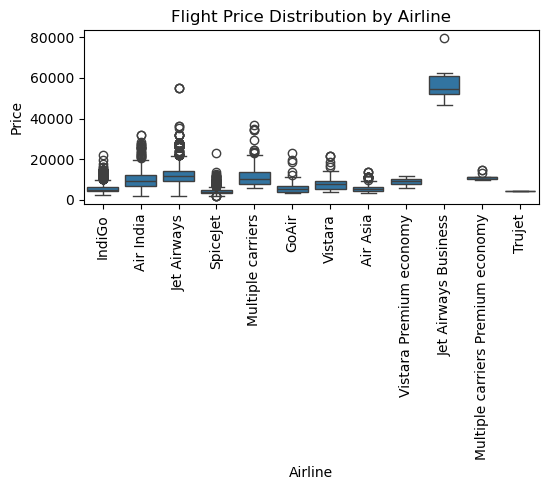

In [19]:
plt.figure(figsize=(15, 5))

# Boxplot for Airlines vs Price
plt.subplot(1, 3, 1)
sns.boxplot(x="Airline", y="Price", data=df)
plt.xticks(rotation=90)
plt.title("Flight Price Distribution by Airline")
plt.tight_layout()
plt.show()


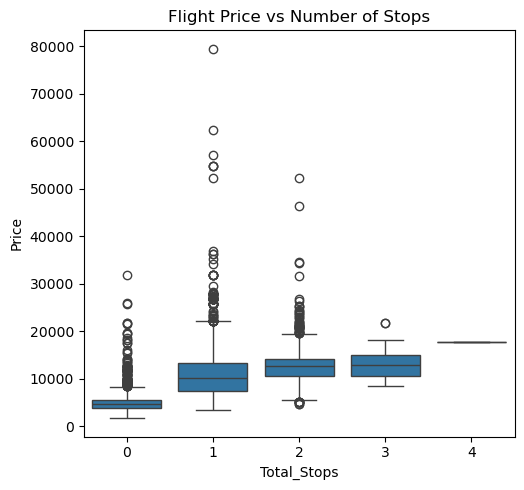

In [20]:
plt.figure(figsize=(15, 5))
# Boxplot for Total Stops vs Price
plt.subplot(1, 3, 2)
sns.boxplot(x="Total_Stops", y="Price", data=df)
plt.title("Flight Price vs Number of Stops")
plt.tight_layout()
plt.show()

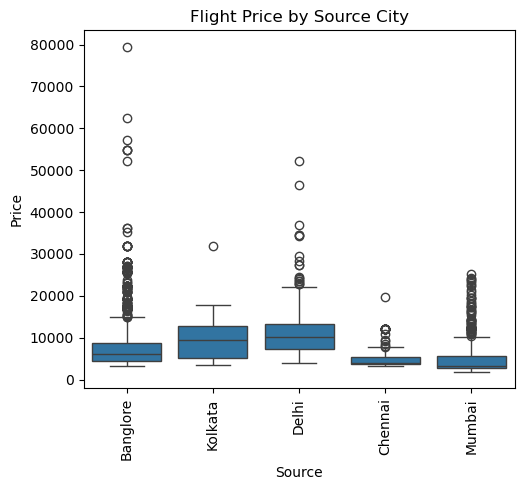

In [21]:
plt.figure(figsize=(15, 5))
# Boxplot for Source vs Price
plt.subplot(1, 3, 3)
sns.boxplot(x="Source", y="Price", data=df)
plt.xticks(rotation=90)
plt.title("Flight Price by Source City")
plt.tight_layout()
plt.show()

# Violin Plot (Price Distribution for Stops)

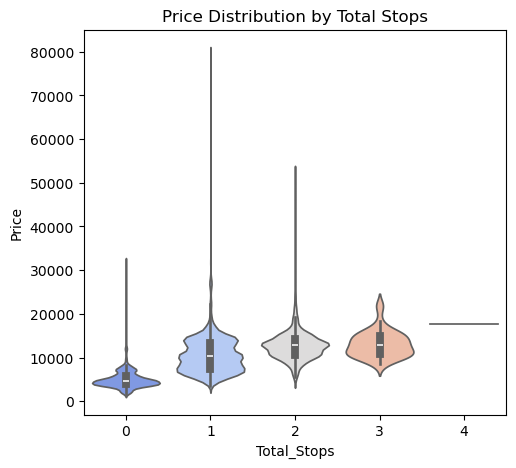

In [22]:
plt.figure(figsize=(12, 5))

# Violin plot for Price vs Total Stops
plt.subplot(1, 2, 1)
sns.violinplot(x="Total_Stops", y="Price", data=df, palette="coolwarm")
plt.title("Price Distribution by Total Stops")
plt.show()


# KDE Plot (Price Density Based on Duration & Departure Time)

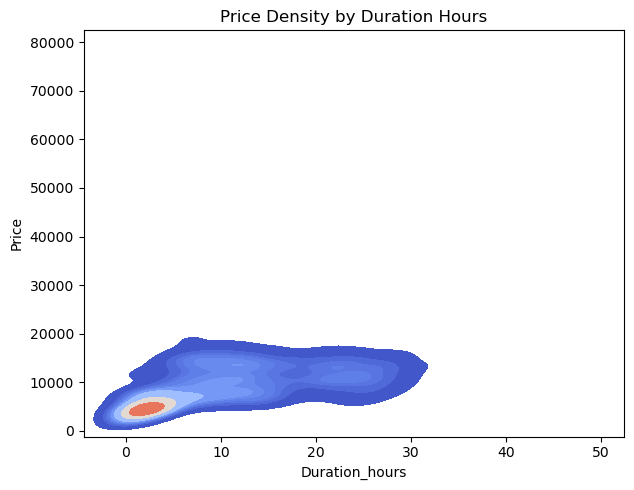

In [23]:
plt.figure(figsize=(12, 5))

# KDE for Duration vs Price
plt.subplot(1, 2, 1)
sns.kdeplot(x=df["Duration_hours"], y=df["Price"], fill=True, cmap="coolwarm")
plt.title("Price Density by Duration Hours")
plt.tight_layout()
plt.show()


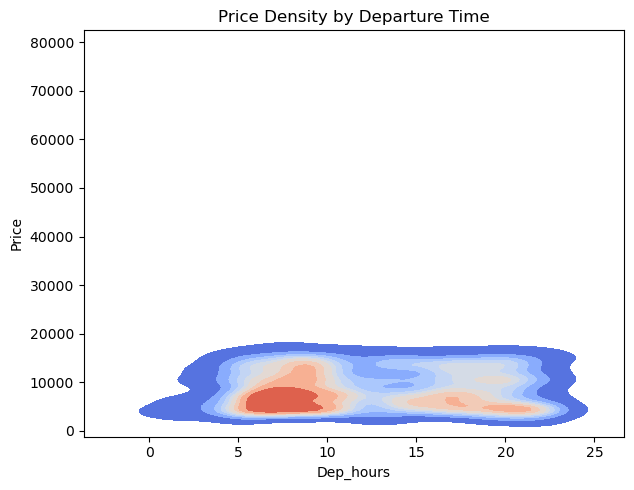

In [24]:
# KDE for Departure Hours vs Price
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
sns.kdeplot(x=df["Dep_hours"], y=df["Price"], fill=True, cmap="coolwarm")
plt.title("Price Density by Departure Time")
plt.tight_layout()
plt.show()

# Violin + Boxplot - Combined Plot for Numerical Distributions

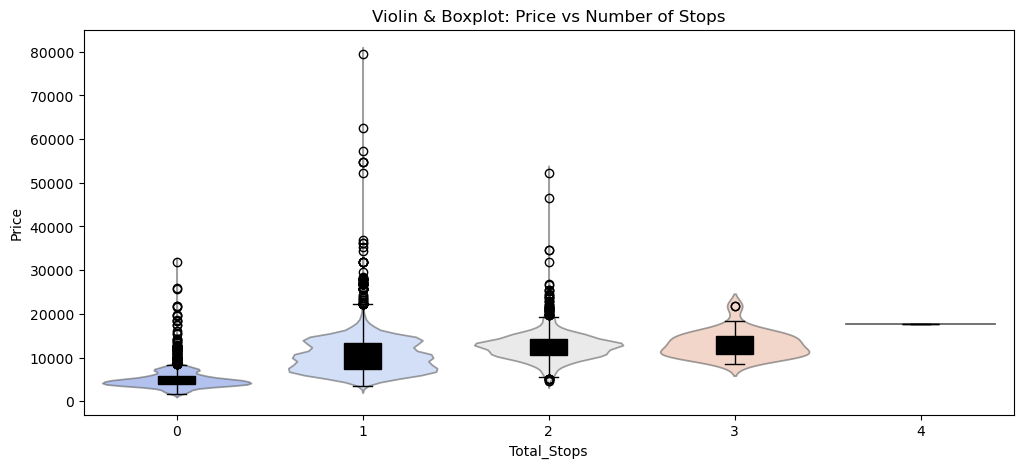

In [25]:
plt.figure(figsize=(12, 5))
# Violin & Boxplot for Duration vs Price
sns.violinplot(x="Total_Stops", y="Price", data=df, inner=None, palette="coolwarm", alpha=0.6)
sns.boxplot(x="Total_Stops", y="Price", data=df, width=0.2, color="black")
plt.title("Violin & Boxplot: Price vs Number of Stops")

plt.show()


# Regression Plot - Linear Trend Between Duration & Price

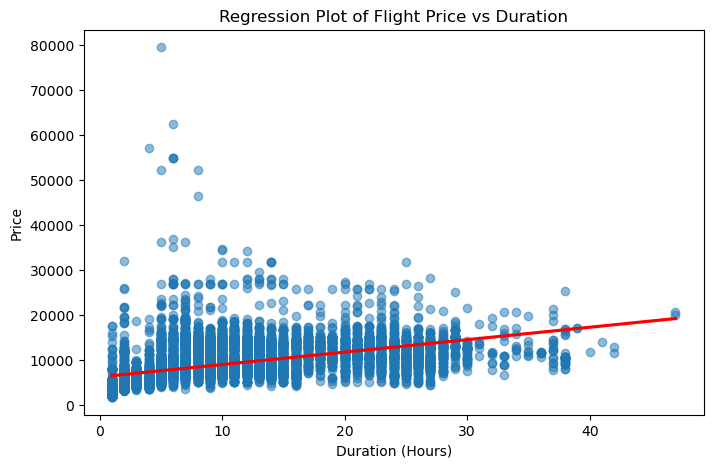

In [26]:
plt.figure(figsize=(8, 5))
sns.regplot(x="Duration_hours", y="Price", data=df, scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
plt.title("Regression Plot of Flight Price vs Duration")
plt.xlabel("Duration (Hours)")
plt.ylabel("Price")
plt.show()

# Dsicripitive Stats for target column 

In [27]:
print(f'Mean: {df["Price"].mean()}')
print(f'Median: {df["Price"].median()}')
print(f'Mode: {df["Price"].mode()[0]}')
print(f'Variance: {df["Price"].var()}')
print(f'Standard Deviation: {df["Price"].std()}')
print(f'Skewness: {df["Price"].skew()}')

Mean: 9087.064120565385
Median: 8372.0
Mode: 10262
Variance: 21264633.365388006
Standard Deviation: 4611.35916681709
Skewness: 1.8125523782189141


### Analysis for target column

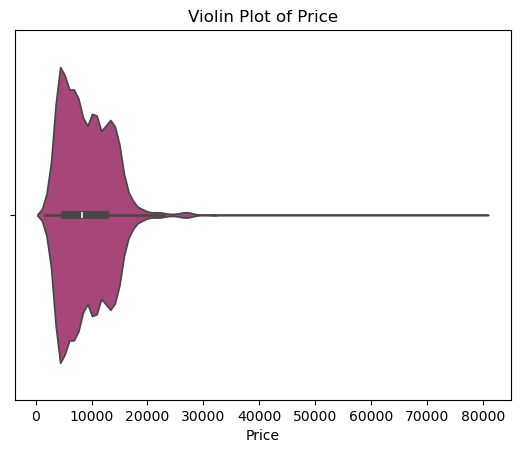

In [28]:
sns.violinplot(x=df['Price'], palette='magma')
plt.title(f'Violin Plot of {'Price'}')
plt.show()


# Histogram & Distribution of Price

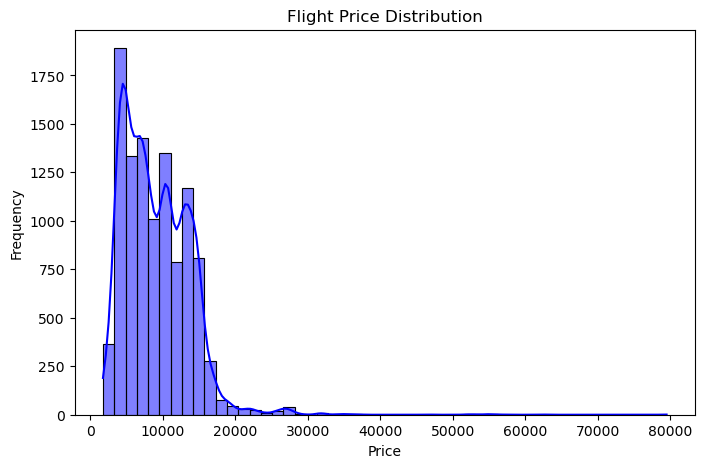

In [29]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Price"], bins=50, kde=True, color="blue")
plt.title("Flight Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


# Scatter Plot: Price vs Key Numerical Features

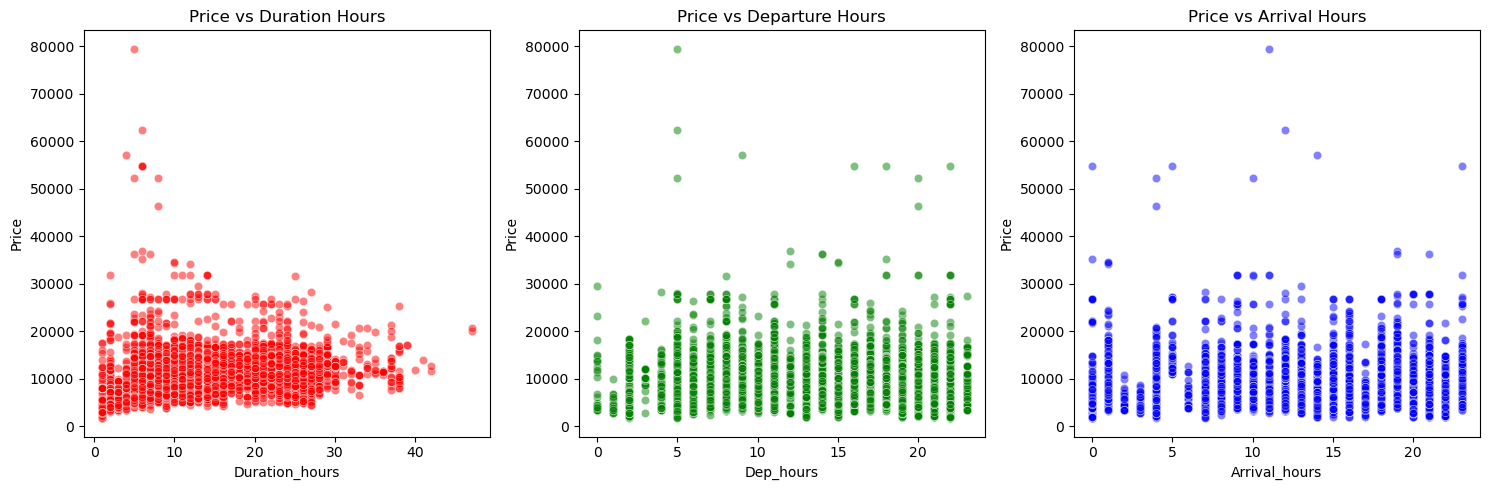

In [30]:
plt.figure(figsize=(15, 5))

# Scatter plot for Price vs Duration Hours
plt.subplot(1, 3, 1)
sns.scatterplot(x="Duration_hours", y="Price", data=df, alpha=0.5, color="red")
plt.title("Price vs Duration Hours")

# Scatter plot for Price vs Departure Hours
plt.subplot(1, 3, 2)
sns.scatterplot(x="Dep_hours", y="Price", data=df, alpha=0.5, color="green")
plt.title("Price vs Departure Hours")

# Scatter plot for Price vs Arrival Hours
plt.subplot(1, 3, 3)
sns.scatterplot(x="Arrival_hours", y="Price", data=df, alpha=0.5, color="blue")
plt.title("Price vs Arrival Hours")

plt.tight_layout()
plt.show()


In [31]:
# analysis of categorical columns
def categorical_analysis(df):
    for col in df.select_dtypes(include=['object', 'category']).columns:
        print(f'Column: {col}')
        print(f'Number of nunique values: {df[col].nunique()}')
        print(f'Unique values: {df[col].unique()}')
        print(f'Value counts:\n{df[col].value_counts()}')
        sns.countplot(x=col, data=df, palette='plasma')
        plt.title(f'Countplot of {col}')
        plt.show()
        



Column: Airline
Number of nunique values: 12
Unique values: ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Value counts:
Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64


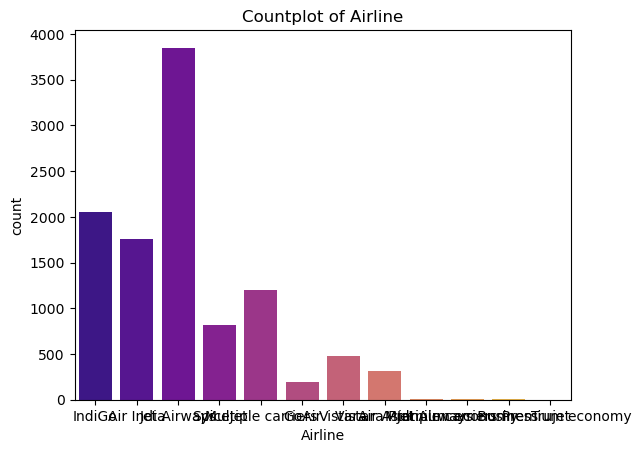

Column: Source
Number of nunique values: 5
Unique values: ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Value counts:
Source
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64


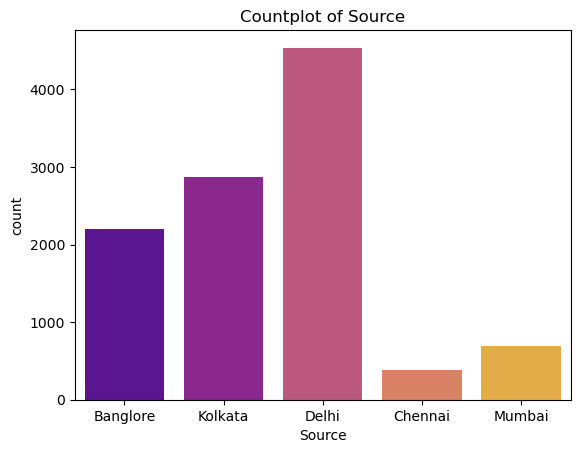

Column: Destination
Number of nunique values: 6
Unique values: ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
Value counts:
Destination
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64


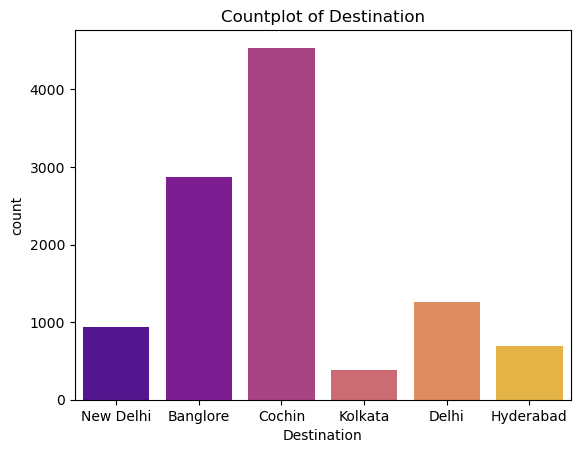

In [32]:
categorical_analysis(df)

In [33]:
# checking and handling of outliers

def Checking_and_Handling_Of_Outliers(df, col):
    sns.boxplot(df[col], color = "lightgreen")
    plt.title(f"Boxplot for {col}")
    plt.show()
        
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    iqr = q3 - q1

    LowerTail = q1 - 1.5*iqr
    UpperTail = q3 + 1.5*iqr

    print(f"25% Quantile q1 = {q1}\n75% Quantile q3 = {q3}\nIQR = {iqr}\n")
    print("-"*80)
    print(f"Lower Tail = {LowerTail}\nUpper Tail = {UpperTail}")
    print("-"*80)

    # Checking for Outliers
    Outliers = df[(df[col] < LowerTail) | (df[col] > UpperTail)]
    print("\nOutliers :\n",Outliers)
    print("-"*80)

    #HAndling of Outliers :
    df.loc[df[col] < LowerTail, col] = LowerTail # all outliers less than lowertail, assigned by lowertail value
    df.loc[df[col] > UpperTail, col] = UpperTail # all outliers greater than uppertail, assigned by uppertail value

    print("After handling of Outliers data:\n")
    print(df.head())

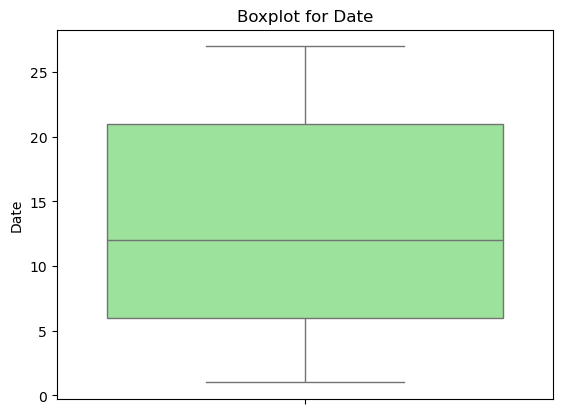

25% Quantile q1 = 6.0
75% Quantile q3 = 21.0
IQR = 15.0

--------------------------------------------------------------------------------
Lower Tail = -16.5
Upper Tail = 43.5
--------------------------------------------------------------------------------

Outliers :
 Empty DataFrame
Columns: [Airline, Source, Destination, Total_Stops, Price, Date, Month, Year, Dep_hours, Dep_min, Arrival_hours, Arrival_min, Duration_hours, Duration_min]
Index: []
--------------------------------------------------------------------------------
After handling of Outliers data:

       Airline    Source Destination  Total_Stops  Price  Date  Month  Year  \
0       IndiGo  Banglore   New Delhi            0   3897  24.0      3  2023   
1    Air India   Kolkata    Banglore            2   7662   1.0      5  2023   
2  Jet Airways     Delhi      Cochin            2  13882   9.0      6  2023   
3       IndiGo   Kolkata    Banglore            1   6218  12.0      5  2023   
4       IndiGo  Banglore   New Delhi  

In [34]:
Checking_and_Handling_Of_Outliers(df,'Date')

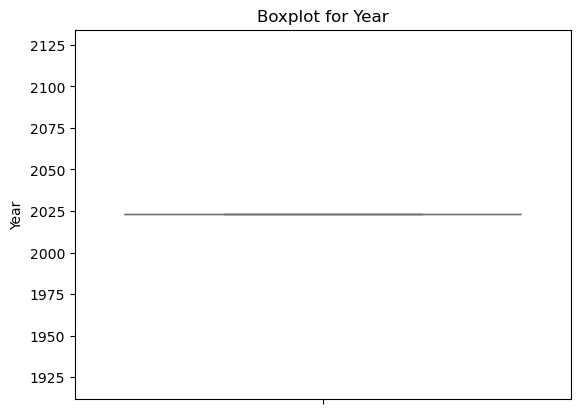

25% Quantile q1 = 2023.0
75% Quantile q3 = 2023.0
IQR = 0.0

--------------------------------------------------------------------------------
Lower Tail = 2023.0
Upper Tail = 2023.0
--------------------------------------------------------------------------------

Outliers :
 Empty DataFrame
Columns: [Airline, Source, Destination, Total_Stops, Price, Date, Month, Year, Dep_hours, Dep_min, Arrival_hours, Arrival_min, Duration_hours, Duration_min]
Index: []
--------------------------------------------------------------------------------
After handling of Outliers data:

       Airline    Source Destination  Total_Stops  Price  Date  Month  Year  \
0       IndiGo  Banglore   New Delhi            0   3897  24.0      3  2023   
1    Air India   Kolkata    Banglore            2   7662   1.0      5  2023   
2  Jet Airways     Delhi      Cochin            2  13882   9.0      6  2023   
3       IndiGo   Kolkata    Banglore            1   6218  12.0      5  2023   
4       IndiGo  Banglore   New 

In [35]:
Checking_and_Handling_Of_Outliers(df,'Year')

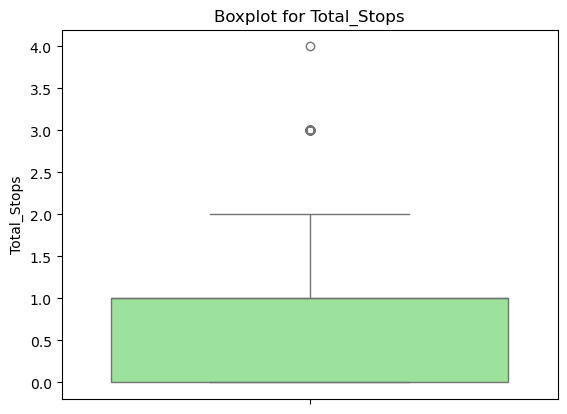

25% Quantile q1 = 0.0
75% Quantile q3 = 1.0
IQR = 1.0

--------------------------------------------------------------------------------
Lower Tail = -1.5
Upper Tail = 2.5
--------------------------------------------------------------------------------

Outliers :
                  Airline    Source Destination  Total_Stops  Price  Date  \
402            Air India     Delhi      Cochin            3  10493  15.0   
919            Air India   Kolkata    Banglore            3  10991  12.0   
1218           Air India     Delhi      Cochin            3  11543  27.0   
1665           Air India  Banglore   New Delhi            3  12346   1.0   
2172           Air India     Delhi      Cochin            3  10703  18.0   
2623           Air India    Mumbai   Hyderabad            3  18293  12.0   
2633   Multiple carriers     Delhi      Cochin            3  21829   6.0   
2718           Air India     Delhi      Cochin            3  15586   9.0   
2814           Air India  Banglore   New Delhi     

In [36]:
Checking_and_Handling_Of_Outliers(df,'Total_Stops')

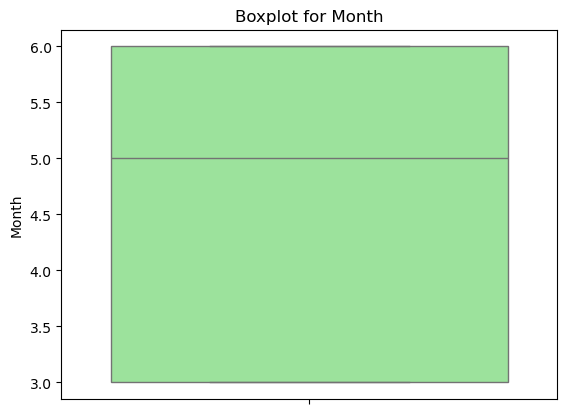

25% Quantile q1 = 3.0
75% Quantile q3 = 6.0
IQR = 3.0

--------------------------------------------------------------------------------
Lower Tail = -1.5
Upper Tail = 10.5
--------------------------------------------------------------------------------

Outliers :
 Empty DataFrame
Columns: [Airline, Source, Destination, Total_Stops, Price, Date, Month, Year, Dep_hours, Dep_min, Arrival_hours, Arrival_min, Duration_hours, Duration_min]
Index: []
--------------------------------------------------------------------------------
After handling of Outliers data:

       Airline    Source Destination  Total_Stops  Price  Date  Month  Year  \
0       IndiGo  Banglore   New Delhi          0.0   3897  24.0    3.0  2023   
1    Air India   Kolkata    Banglore          2.0   7662   1.0    5.0  2023   
2  Jet Airways     Delhi      Cochin          2.0  13882   9.0    6.0  2023   
3       IndiGo   Kolkata    Banglore          1.0   6218  12.0    5.0  2023   
4       IndiGo  Banglore   New Delhi     

In [37]:
Checking_and_Handling_Of_Outliers(df,'Month')

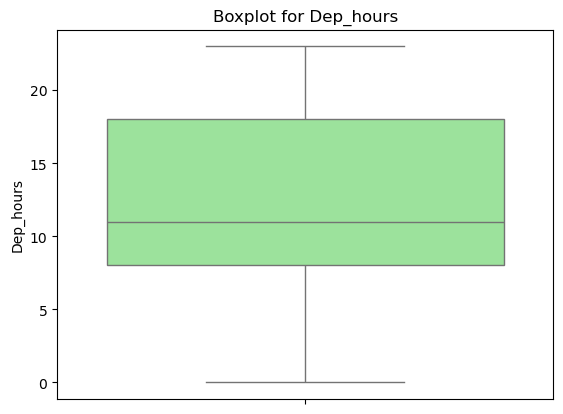

25% Quantile q1 = 8.0
75% Quantile q3 = 18.0
IQR = 10.0

--------------------------------------------------------------------------------
Lower Tail = -7.0
Upper Tail = 33.0
--------------------------------------------------------------------------------

Outliers :
 Empty DataFrame
Columns: [Airline, Source, Destination, Total_Stops, Price, Date, Month, Year, Dep_hours, Dep_min, Arrival_hours, Arrival_min, Duration_hours, Duration_min]
Index: []
--------------------------------------------------------------------------------
After handling of Outliers data:

       Airline    Source Destination  Total_Stops  Price  Date  Month  Year  \
0       IndiGo  Banglore   New Delhi          0.0   3897  24.0    3.0  2023   
1    Air India   Kolkata    Banglore          2.0   7662   1.0    5.0  2023   
2  Jet Airways     Delhi      Cochin          2.0  13882   9.0    6.0  2023   
3       IndiGo   Kolkata    Banglore          1.0   6218  12.0    5.0  2023   
4       IndiGo  Banglore   New Delhi   

In [38]:
Checking_and_Handling_Of_Outliers(df,'Dep_hours')

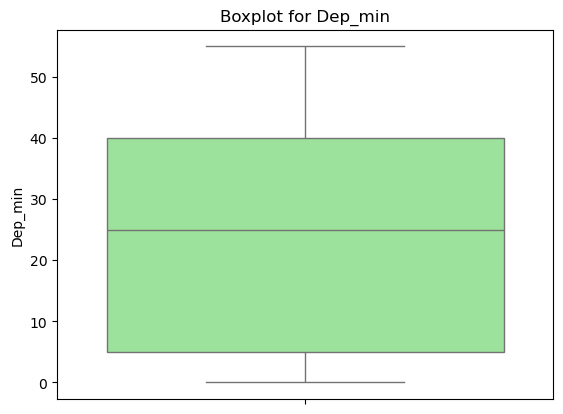

25% Quantile q1 = 5.0
75% Quantile q3 = 40.0
IQR = 35.0

--------------------------------------------------------------------------------
Lower Tail = -47.5
Upper Tail = 92.5
--------------------------------------------------------------------------------

Outliers :
 Empty DataFrame
Columns: [Airline, Source, Destination, Total_Stops, Price, Date, Month, Year, Dep_hours, Dep_min, Arrival_hours, Arrival_min, Duration_hours, Duration_min]
Index: []
--------------------------------------------------------------------------------
After handling of Outliers data:

       Airline    Source Destination  Total_Stops  Price  Date  Month  Year  \
0       IndiGo  Banglore   New Delhi          0.0   3897  24.0    3.0  2023   
1    Air India   Kolkata    Banglore          2.0   7662   1.0    5.0  2023   
2  Jet Airways     Delhi      Cochin          2.0  13882   9.0    6.0  2023   
3       IndiGo   Kolkata    Banglore          1.0   6218  12.0    5.0  2023   
4       IndiGo  Banglore   New Delhi  

In [39]:
Checking_and_Handling_Of_Outliers(df,'Dep_min')

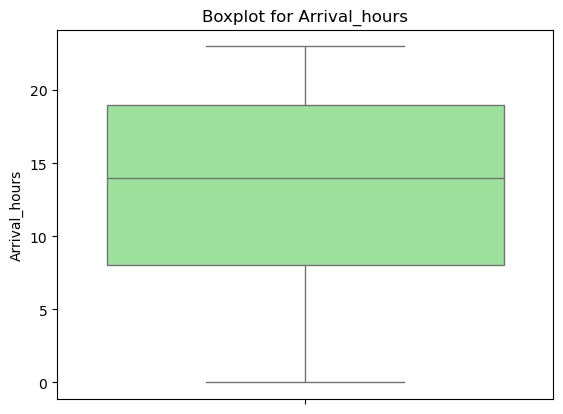

25% Quantile q1 = 8.0
75% Quantile q3 = 19.0
IQR = 11.0

--------------------------------------------------------------------------------
Lower Tail = -8.5
Upper Tail = 35.5
--------------------------------------------------------------------------------

Outliers :
 Empty DataFrame
Columns: [Airline, Source, Destination, Total_Stops, Price, Date, Month, Year, Dep_hours, Dep_min, Arrival_hours, Arrival_min, Duration_hours, Duration_min]
Index: []
--------------------------------------------------------------------------------
After handling of Outliers data:

       Airline    Source Destination  Total_Stops  Price  Date  Month  Year  \
0       IndiGo  Banglore   New Delhi          0.0   3897  24.0    3.0  2023   
1    Air India   Kolkata    Banglore          2.0   7662   1.0    5.0  2023   
2  Jet Airways     Delhi      Cochin          2.0  13882   9.0    6.0  2023   
3       IndiGo   Kolkata    Banglore          1.0   6218  12.0    5.0  2023   
4       IndiGo  Banglore   New Delhi   

In [40]:
Checking_and_Handling_Of_Outliers(df,'Arrival_hours')

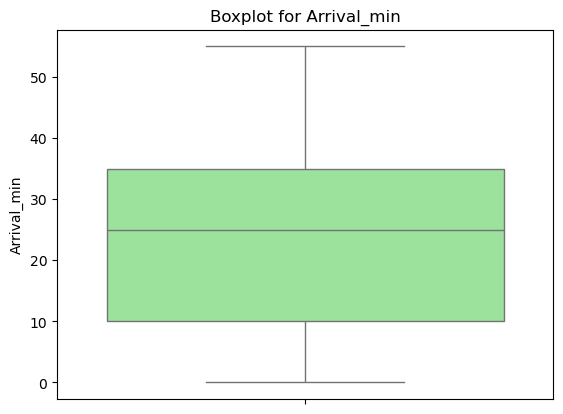

25% Quantile q1 = 10.0
75% Quantile q3 = 35.0
IQR = 25.0

--------------------------------------------------------------------------------
Lower Tail = -27.5
Upper Tail = 72.5
--------------------------------------------------------------------------------

Outliers :
 Empty DataFrame
Columns: [Airline, Source, Destination, Total_Stops, Price, Date, Month, Year, Dep_hours, Dep_min, Arrival_hours, Arrival_min, Duration_hours, Duration_min]
Index: []
--------------------------------------------------------------------------------
After handling of Outliers data:

       Airline    Source Destination  Total_Stops  Price  Date  Month  Year  \
0       IndiGo  Banglore   New Delhi          0.0   3897  24.0    3.0  2023   
1    Air India   Kolkata    Banglore          2.0   7662   1.0    5.0  2023   
2  Jet Airways     Delhi      Cochin          2.0  13882   9.0    6.0  2023   
3       IndiGo   Kolkata    Banglore          1.0   6218  12.0    5.0  2023   
4       IndiGo  Banglore   New Delhi 

In [41]:
Checking_and_Handling_Of_Outliers(df,'Arrival_min')

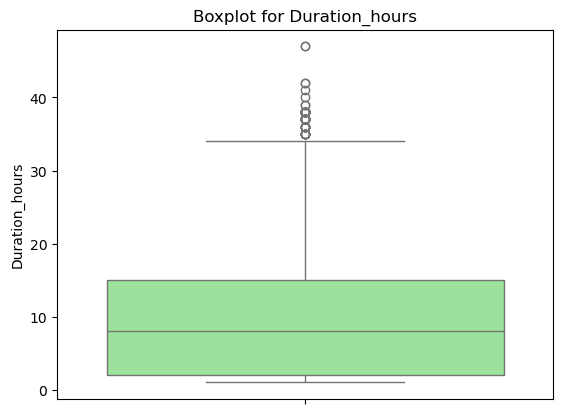

25% Quantile q1 = 2.0
75% Quantile q3 = 15.0
IQR = 13.0

--------------------------------------------------------------------------------
Lower Tail = -17.5
Upper Tail = 34.5
--------------------------------------------------------------------------------

Outliers :
            Airline    Source Destination  Total_Stops  Price  Date  Month  \
226    Jet Airways     Delhi      Cochin          2.0  18799   3.0    3.0   
553      Air India     Delhi      Cochin          2.0  10598   9.0    3.0   
919      Air India   Kolkata    Banglore          2.5  10991  12.0    5.0   
925    Jet Airways     Delhi      Cochin          2.0  19907   6.0    3.0   
966      Air India     Delhi      Cochin          2.0  10493  21.0    5.0   
...            ...       ...         ...          ...    ...   ...    ...   
9848     Air India  Banglore   New Delhi          2.0  17135   1.0    3.0   
10020    Air India     Delhi      Cochin          2.0   9653   9.0    5.0   
10326    Air India  Banglore   New Del

In [42]:
Checking_and_Handling_Of_Outliers(df,'Duration_hours')

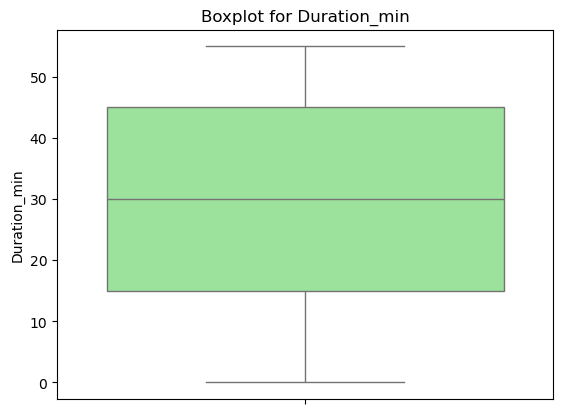

25% Quantile q1 = 15.0
75% Quantile q3 = 45.0
IQR = 30.0

--------------------------------------------------------------------------------
Lower Tail = -30.0
Upper Tail = 90.0
--------------------------------------------------------------------------------

Outliers :
 Empty DataFrame
Columns: [Airline, Source, Destination, Total_Stops, Price, Date, Month, Year, Dep_hours, Dep_min, Arrival_hours, Arrival_min, Duration_hours, Duration_min]
Index: []
--------------------------------------------------------------------------------
After handling of Outliers data:

       Airline    Source Destination  Total_Stops  Price  Date  Month  Year  \
0       IndiGo  Banglore   New Delhi          0.0   3897  24.0    3.0  2023   
1    Air India   Kolkata    Banglore          2.0   7662   1.0    5.0  2023   
2  Jet Airways     Delhi      Cochin          2.0  13882   9.0    6.0  2023   
3       IndiGo   Kolkata    Banglore          1.0   6218  12.0    5.0  2023   
4       IndiGo  Banglore   New Delhi 

In [43]:
Checking_and_Handling_Of_Outliers(df,'Duration_min')

In [44]:
## Correlation between two columns
corr = df.iloc[:, [5,6]].corr()
corr

,Date,Month
Date,1.000000,-0.038378
Month,-0.038378,1.000000


<Axes: >

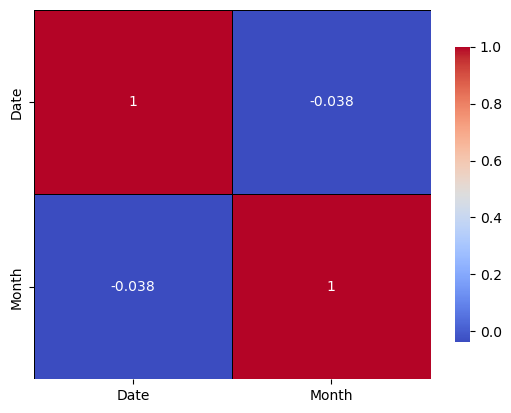

In [45]:
## show the analysis of correlation of heatmap
sns.heatmap(corr,annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black', cbar_kws={'shrink': 0.8})

## Feature Engineenrg

In [46]:
## Encoding
df['Airline'].replace({'IndiGo':1,'Air India':2,'Jet Airways':3,'SpiceJet':4,'Multiple carriers':5,'GoAir':6,'Vistara':7,'Air Asia':8,'Vistara Premium economy':9,'Jet Airways Business':10,'Multiple carriers Premium economy':11,'Trujet':12},inplace=True)
df['Source'].replace({'Banglore':1,'Kolkata':2,'Delhi':3,'Mumbai':4,'Chennai':5},inplace=True)
df['Destination'].replace({'New Delhi':0,'Banglore':1,'Cochin':2,'Kolkata':3,'Hyderabad':4,'Delhi':5},inplace=True)

## Assumption1 : Linearity

In [47]:
# feature selection and check for association between all columns
df.corr()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
Airline,1.000000,-0.035005,-0.000279,-0.032944,0.067032,0.019546,0.028765,NaN,-0.017519,0.046600,0.044148,0.005833,-0.025845,-0.007719
Source,-0.035005,1.000000,0.107644,0.132993,-0.032143,0.066427,0.151026,NaN,-0.072211,-0.017491,-0.018266,-0.117147,0.039365,-0.233004
Destination,-0.000279,0.107644,1.000000,-0.438226,-0.400182,0.047096,0.204076,NaN,-0.041664,-0.011071,-0.052428,0.044275,-0.388677,0.094428
Total_Stops,-0.032944,0.132993,-0.438226,1.000000,0.606655,-0.008843,0.055524,NaN,-0.059552,-0.002703,0.037320,-0.107031,0.742242,-0.136685
Price,0.067032,-0.032143,-0.400182,0.606655,1.000000,-0.153738,-0.103651,NaN,0.006819,-0.024492,0.024264,-0.086155,0.510728,-0.124918
Date,0.019546,0.066427,0.047096,-0.008843,-0.153738,1.000000,-0.038378,NaN,0.002220,-0.008261,-0.003192,-0.017511,-0.022213,-0.008971
Month,0.028765,0.151026,0.204076,0.055524,-0.103651,-0.038378,1.000000,NaN,0.039112,-0.059238,-0.003941,-0.100626,0.018461,-0.040837
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dep_hours,-0.017519,-0.072211,-0.041664,-0.059552,0.006819,0.002220,0.039112,NaN,1.000000,-0.024806,0.005215,0.067909,0.005584,-0.023761
Dep_min,0.046600,-0.017491,-0.011071,-0.002703,-0.024492,-0.008261,-0.059238,NaN,-0.024806,1.000000,0.043054,-0.017594,-0.021759,0.092507


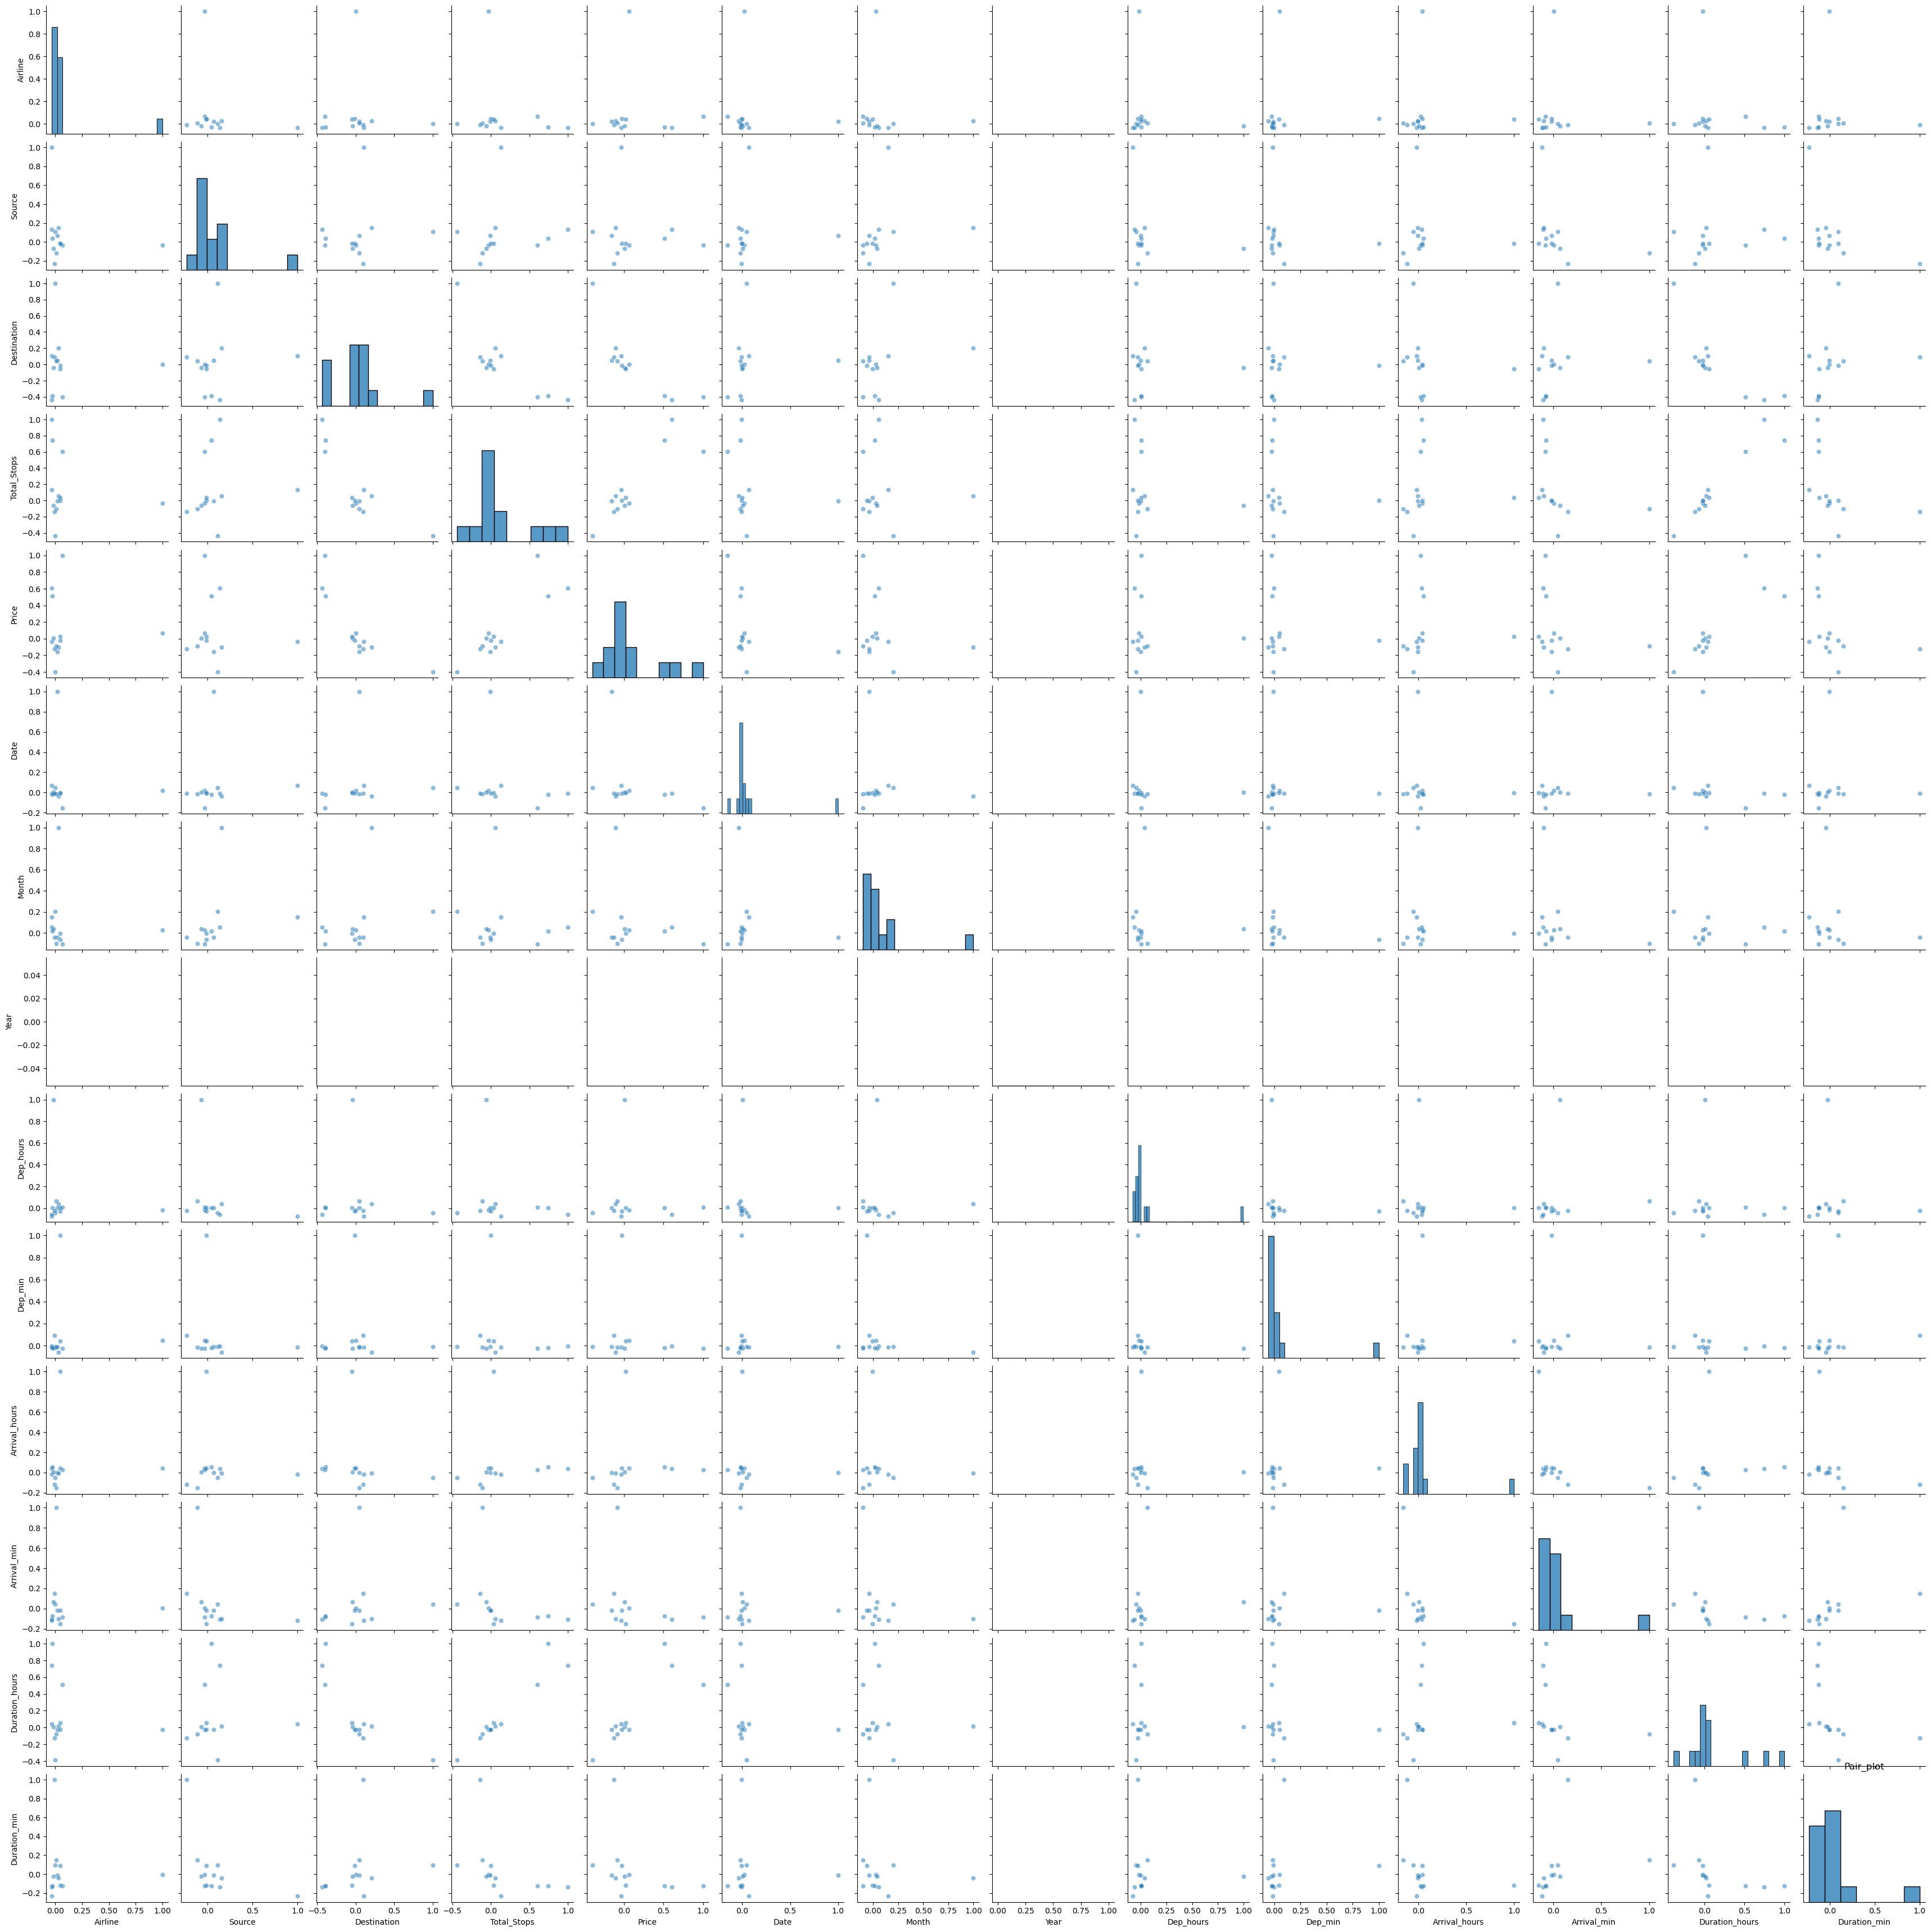

In [48]:
# Pairplot for entire dataset and correlation heatmap
sns.pairplot(df.corr(), palette='viridis',plot_kws={'alpha':0.5})
plt.title('Pair_plot')
plt.show()

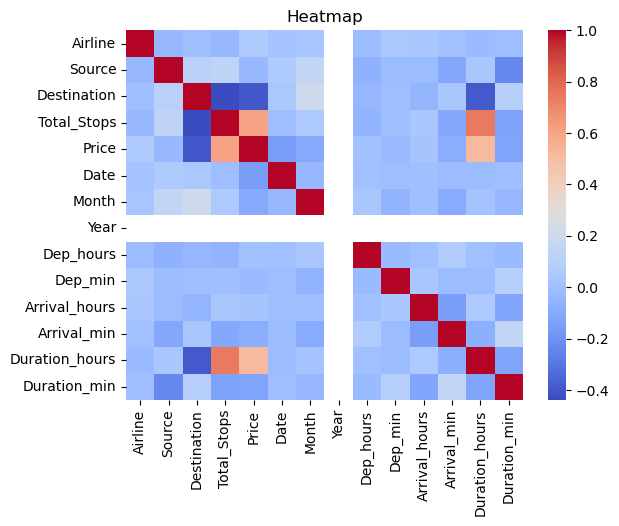

In [49]:
# Correlation heatmap with numeric 
sns.heatmap(df.corr(), cmap='coolwarm')  # Multivarivate analysis
plt.title('Heatmap')
plt.show()

#### 2. No multicolinearity/ Independance

In [50]:
df1 = df.iloc[:, :14]
df1

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,1,1,0,0.0,3897,24.0,3.0,2023,22,20.0,1.0,10.0,2.0,50
1,2,2,1,2.0,7662,1.0,5.0,2023,5,50.0,13.0,15.0,7.0,25
2,3,3,2,2.0,13882,9.0,6.0,2023,9,25.0,4.0,25.0,19.0,0
3,1,2,1,1.0,6218,12.0,5.0,2023,18,5.0,23.0,30.0,5.0,25
4,1,1,0,1.0,13302,1.0,3.0,2023,16,50.0,21.0,35.0,4.0,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,8,2,1,0.0,4107,9.0,4.0,2023,19,55.0,22.0,25.0,2.0,30
10679,2,2,1,0.0,4145,27.0,4.0,2023,20,45.0,23.0,20.0,2.0,35
10680,3,1,5,0.0,7229,27.0,4.0,2023,8,20.0,11.0,20.0,3.0,0
10681,7,1,0,0.0,12648,1.0,3.0,2023,11,30.0,14.0,10.0,2.0,40


In [51]:
vif_df = pd.DataFrame()

vif_df["Independant Feature"] = df1.columns

vif_df

,Independant Feature
0,Airline
1,Source
2,Destination
3,Total_Stops
4,Price
5,Date
6,Month
7,Year
8,Dep_hours
9,Dep_min


In [52]:
a = df1.shape[1]
a

14

In [53]:
vif_list = []

for i in range(a):
    vif = variance_inflation_factor(df1.to_numpy(), i)
    vif_list.append(vif)

vif_df["VIF"] = vif_list

vif_df

,Independant Feature,VIF
0,Airline,1.025121
1,Source,1.159886
2,Destination,1.405577
3,Total_Stops,2.981820
4,Price,1.807234
5,Date,1.049337
6,Month,1.134873
7,Year,60.509351
8,Dep_hours,1.030849
9,Dep_min,1.021182


#### Train Test Split

In [54]:
# Define Features and Target 
X = df.drop(columns=['Price']) # Features: Feature1 and Feature2 
y = df['Price'] # Target: Price # Train-Test Split 


xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42) # Print Shapes of the Splits 

print(f'Shape of X_train: {xtrain.shape}') 
print(f'Shape of X_test: {xtest.shape}') 
print(f'Shape of y_train: {ytrain.shape}') 
print(f'Shape of y_test: {ytest.shape}')

Shape of X_train: (8546, 13)
Shape of X_test: (2137, 13)
Shape of y_train: (8546,)
Shape of y_test: (2137,)


# Model Training

## Algorithm1 - Linear Regression

In [55]:
lin_reg=LinearRegression()
lin_reg

LinearRegression()

In [56]:
lin_reg_model = lin_reg.fit(xtrain,ytrain) # linear regression working, bfl, cost, gradient descent
lin_reg_model

LinearRegression()

In [57]:
xtrain.head()

,Airline,Source,Destination,Total_Stops,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
8990,3,4,4,2.0,12.0,3.0,2023,6,30.0,16.0,35.0,10.0,5
3684,3,3,2,1.0,9.0,5.0,2023,11,30.0,12.0,35.0,25.0,5
1034,4,3,2,1.0,24.0,4.0,2023,15,45.0,22.0,5.0,6.0,20
3909,5,3,2,1.0,21.0,3.0,2023,12,50.0,1.0,35.0,12.0,45
3088,2,3,2,2.0,24.0,6.0,2023,17,15.0,19.0,15.0,26.0,0


In [58]:
ytrain.head()

8990    23528
3684    12373
1034     5583
3909     7695
3088    11972
Name: Price, dtype: int64

In [59]:
ytrain_pred = lin_reg_model.predict(xtrain)
ytrain_pred

array([12993.92034197, 10618.01330572,  9191.91279454, ...,
        9522.69511563,  7480.57653742, 10480.05548173])

In [60]:
residual = ytrain - ytrain_pred
residual

8990    10534.079658
3684     1754.986694
1034    -3608.912795
3909    -2206.720391
3088     -854.932958
            ...     
5734     2158.954684
5191     1024.546149
5390    -1852.695116
860     -1336.576537
7270     -218.055482
Name: Price, Length: 8546, dtype: float64

#### Assumption3 : Normality of residual

<Axes: xlabel='Price', ylabel='Density'>

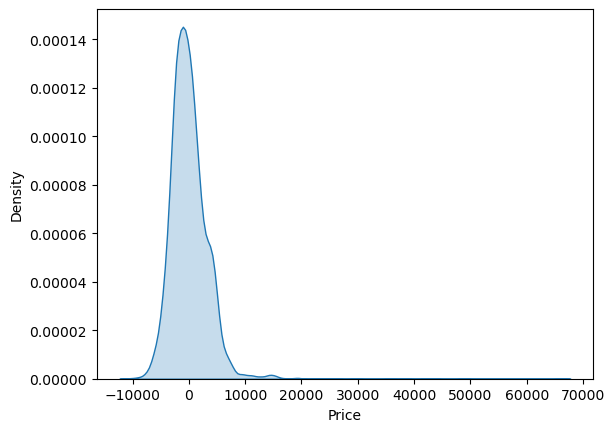

In [61]:
sns.kdeplot(residual, fill = True,palette="viridis")

In [62]:
stats, p_val = shapiro(residual)

if p_val >= 0.05:
    print("Null Hypothesis H0 is True")
    print("normally distributed")
else:
    print("Alternative Hypothesis H1 is True")
    print(" NOt normally distributed")

Alternative Hypothesis H1 is True
 NOt normally distributed


### Assumption4: Homoscadasticity

<Axes: xlabel='Price', ylabel='Price'>

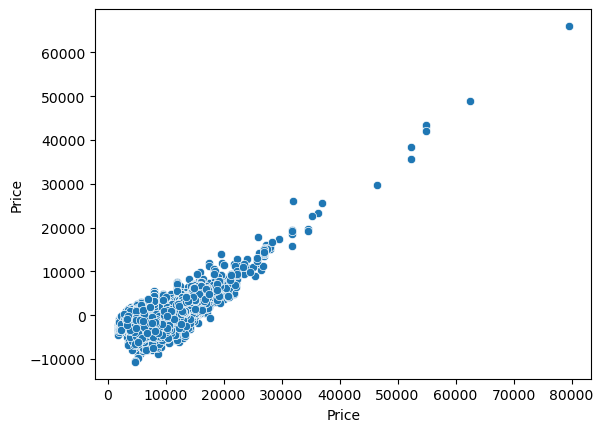

In [63]:
sns.scatterplot(x=ytrain, y=residual,palette="deep")

### Model Evaluation

In [64]:
print("------------------------- Evaluation for Training Data -------------------------")
mse = mean_squared_error(ytrain, ytrain_pred)
print("mean squared error (MSE) : ", mse)
print("-"*80)

mae = mean_absolute_error(ytrain, ytrain_pred)
print("mean absolute error (MAE) : ", mae)
print("-"*80)

rmse = np.sqrt(mse)
print("Root mean squared error (RMSE) : ", rmse)
print("-"*80)

r2score = r2_score(ytrain, ytrain_pred)
print("R2 Score : ", r2score)
print("-"*80)

------------------------- Evaluation for Training Data -------------------------
mean squared error (MSE) :  11737152.518390955
--------------------------------------------------------------------------------
mean absolute error (MAE) :  2407.56260279399
--------------------------------------------------------------------------------
Root mean squared error (RMSE) :  3425.9527898660476
--------------------------------------------------------------------------------
R2 Score :  0.44861229952365334
--------------------------------------------------------------------------------


In [65]:
xtest

,Airline,Source,Destination,Total_Stops,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
6076,3,2,1,1.0,18.0,5.0,2023,5,45.0,18.0,15.0,12.0,30
3544,6,3,2,1.0,3.0,6.0,2023,10,35.0,19.0,35.0,9.0,0
7313,3,2,1,1.0,1.0,5.0,2023,14,5.0,19.0,50.0,5.0,45
5032,1,5,3,0.0,24.0,5.0,2023,14,45.0,17.0,5.0,2.0,20
2483,3,3,2,1.0,21.0,5.0,2023,22,50.0,4.0,25.0,5.0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9797,5,3,2,1.0,27.0,6.0,2023,8,0.0,21.0,0.0,13.0,0
9871,4,2,1,0.0,6.0,3.0,2023,17,15.0,19.0,45.0,2.0,30
10063,8,3,2,1.0,21.0,4.0,2023,7,55.0,22.0,25.0,14.0,30
7623,1,1,5,0.0,9.0,4.0,2023,8,30.0,11.0,20.0,2.0,50


In [66]:
ytest

6076     10844
3544      4959
7313     14781
5032      3858
2483     12898
         ...  
9797      7408
9871      4622
10063     7452
7623      4823
8618     13731
Name: Price, Length: 2137, dtype: int64

In [67]:
ytest_pred = lin_reg_model.predict(xtest)
ytest_pred

array([ 9446.61353017, 10365.09444205, 10252.52225828, ...,
       10117.23495785,  5232.85074999, 10186.58545006])

In [68]:
print("------------------------- Evaluation for Testing Data -------------------------")
mse = mean_squared_error(ytest, ytest_pred)
print("mean squared error (MSE) : ", mse)
print("-"*80)

mae = mean_absolute_error(ytest, ytest_pred)
print("mean absolute error (MAE) : ", mae)
print("-"*80)

rmse = np.sqrt(mse)
print("Root mean squared error (RMSE) : ", rmse)
print("-"*80)

r2score = r2_score(ytest, ytest_pred)
print("R2 Score : ", r2score)
print("-"*80)

------------------------- Evaluation for Testing Data -------------------------
mean squared error (MSE) :  11899463.02605416
--------------------------------------------------------------------------------
mean absolute error (MAE) :  2444.2732940382652
--------------------------------------------------------------------------------
Root mean squared error (RMSE) :  3449.5598307688706
--------------------------------------------------------------------------------
R2 Score :  0.43774890799068644
--------------------------------------------------------------------------------


# Lasso

In [69]:
lass=Lasso()
lass
lass_model = lass.fit(xtrain,ytrain) # linear regression working, bfl, cost, gradient descent
lass_model

Lasso()

In [70]:
xtrain.head()

,Airline,Source,Destination,Total_Stops,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
8990,3,4,4,2.0,12.0,3.0,2023,6,30.0,16.0,35.0,10.0,5
3684,3,3,2,1.0,9.0,5.0,2023,11,30.0,12.0,35.0,25.0,5
1034,4,3,2,1.0,24.0,4.0,2023,15,45.0,22.0,5.0,6.0,20
3909,5,3,2,1.0,21.0,3.0,2023,12,50.0,1.0,35.0,12.0,45
3088,2,3,2,2.0,24.0,6.0,2023,17,15.0,19.0,15.0,26.0,0


In [71]:
ytrain.head()

8990    23528
3684    12373
1034     5583
3909     7695
3088    11972
Name: Price, dtype: int64

In [72]:
ytrain_pred = lass_model.predict(xtrain)
ytrain_pred

array([12988.07556565, 10622.0467927 ,  9189.83397707, ...,
        9522.56852741,  7481.30189788, 10481.47138312])

In [73]:
residual = ytrain - ytrain_pred
residual

8990    10539.924434
3684     1750.953207
1034    -3606.833977
3909    -2205.161873
3088     -854.768316
            ...     
5734     2158.190591
5191     1026.542489
5390    -1852.568527
860     -1337.301898
7270     -219.471383
Name: Price, Length: 8546, dtype: float64

<Axes: xlabel='Price', ylabel='Density'>

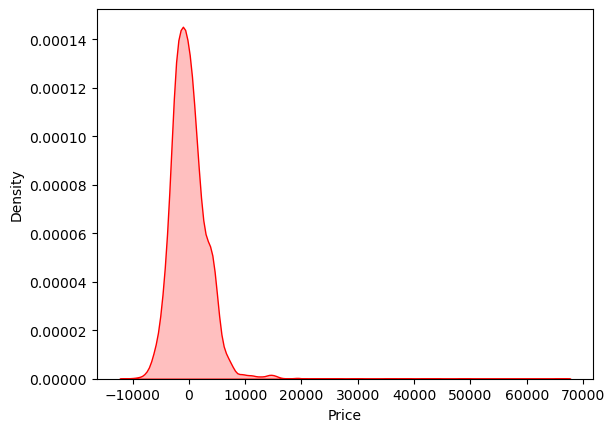

In [74]:
sns.kdeplot(residual, fill = True,color="red")

In [75]:
stats, p_val = shapiro(residual)

if p_val >= 0.05:
    print("Null Hypothesis H0 is True")
    print("normally distributed")
else:
    print("Alternative Hypothesis H1 is True")
    print(" NOt normally distributed")

Alternative Hypothesis H1 is True
 NOt normally distributed


<Axes: xlabel='Price', ylabel='Price'>

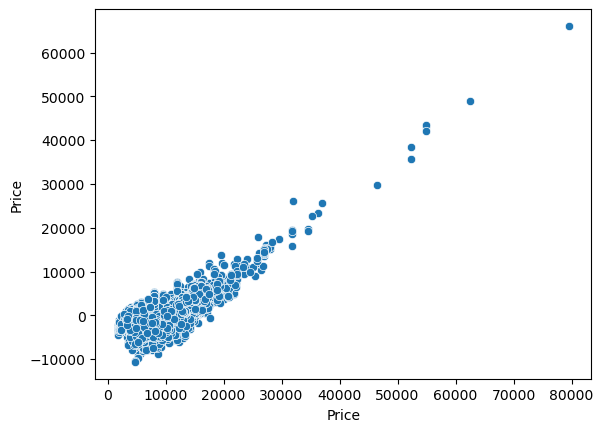

In [76]:
sns.scatterplot(x=ytrain, y=residual,palette="deep")

In [77]:
print("------------------------- Evaluation for Training Data -------------------------")
mse = mean_squared_error(ytrain, ytrain_pred)
print("mean squared error (MSE) : ", mse)
print("-"*80)

mae = mean_absolute_error(ytrain, ytrain_pred)
print("mean absolute error (MAE) : ", mae)
print("-"*80)

rmse = np.sqrt(mse)
print("Root mean squared error (RMSE) : ", rmse)
print("-"*80)

r2score = r2_score(ytrain, ytrain_pred)
print("R2 Score : ", r2score)
print("-"*80)

------------------------- Evaluation for Training Data -------------------------
mean squared error (MSE) :  11737159.880622026
--------------------------------------------------------------------------------
mean absolute error (MAE) :  2407.470036661922
--------------------------------------------------------------------------------
Root mean squared error (RMSE) :  3425.9538643452315
--------------------------------------------------------------------------------
R2 Score :  0.4486119536609192
--------------------------------------------------------------------------------


In [78]:
xtest

,Airline,Source,Destination,Total_Stops,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
6076,3,2,1,1.0,18.0,5.0,2023,5,45.0,18.0,15.0,12.0,30
3544,6,3,2,1.0,3.0,6.0,2023,10,35.0,19.0,35.0,9.0,0
7313,3,2,1,1.0,1.0,5.0,2023,14,5.0,19.0,50.0,5.0,45
5032,1,5,3,0.0,24.0,5.0,2023,14,45.0,17.0,5.0,2.0,20
2483,3,3,2,1.0,21.0,5.0,2023,22,50.0,4.0,25.0,5.0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9797,5,3,2,1.0,27.0,6.0,2023,8,0.0,21.0,0.0,13.0,0
9871,4,2,1,0.0,6.0,3.0,2023,17,15.0,19.0,45.0,2.0,30
10063,8,3,2,1.0,21.0,4.0,2023,7,55.0,22.0,25.0,14.0,30
7623,1,1,5,0.0,9.0,4.0,2023,8,30.0,11.0,20.0,2.0,50


In [79]:
ytest

6076     10844
3544      4959
7313     14781
5032      3858
2483     12898
         ...  
9797      7408
9871      4622
10063     7452
7623      4823
8618     13731
Name: Price, Length: 2137, dtype: int64

In [80]:
ytest_pred = lass_model.predict(xtest)
ytest_pred

array([ 9446.94444806, 10364.59302412, 10250.18601666, ...,
       10116.83260904,  5233.0571739 , 10186.22814823])

In [81]:
print("------------------------- Evaluation for Testing Data -------------------------")
mse = mean_squared_error(ytest, ytest_pred)
print("mean squared error (MSE) : ", mse)
print("-"*80)

mae = mean_absolute_error(ytest, ytest_pred)
print("mean absolute error (MAE) : ", mae)
print("-"*80)

rmse = np.sqrt(mse)
print("Root mean squared error (RMSE) : ", rmse)
print("-"*80)

r2score = r2_score(ytest, ytest_pred)
print("R2 Score : ", r2score)
print("-"*80)

------------------------- Evaluation for Testing Data -------------------------
mean squared error (MSE) :  11899423.042882254
--------------------------------------------------------------------------------
mean absolute error (MAE) :  2444.1444911448493
--------------------------------------------------------------------------------
Root mean squared error (RMSE) :  3449.5540353619995
--------------------------------------------------------------------------------
R2 Score :  0.43775079720047827
--------------------------------------------------------------------------------


# Ridge

In [82]:
ride=Ridge()
ride
ride_model = ride.fit(xtrain,ytrain) # linear regression working, bfl, cost, gradient descent
ride_model

Ridge()

In [83]:
xtrain.head()

,Airline,Source,Destination,Total_Stops,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
8990,3,4,4,2.0,12.0,3.0,2023,6,30.0,16.0,35.0,10.0,5
3684,3,3,2,1.0,9.0,5.0,2023,11,30.0,12.0,35.0,25.0,5
1034,4,3,2,1.0,24.0,4.0,2023,15,45.0,22.0,5.0,6.0,20
3909,5,3,2,1.0,21.0,3.0,2023,12,50.0,1.0,35.0,12.0,45
3088,2,3,2,2.0,24.0,6.0,2023,17,15.0,19.0,15.0,26.0,0


In [84]:
ytrain.head()

8990    23528
3684    12373
1034     5583
3909     7695
3088    11972
Name: Price, dtype: int64

In [85]:
ytrain_pred = ride_model.predict(xtrain)
ytrain_pred

array([12990.91401289, 10619.55742775,  9191.03950942, ...,
        9522.66553128,  7481.74718423, 10480.47193658])

In [86]:
residual = ytrain - ytrain_pred
residual

8990    10537.085987
3684     1753.442572
1034    -3608.039509
3909    -2206.427617
3088     -854.363393
            ...     
5734     2158.333232
5191     1025.382874
5390    -1852.665531
860     -1337.747184
7270     -218.471937
Name: Price, Length: 8546, dtype: float64

<Axes: xlabel='Price', ylabel='Density'>

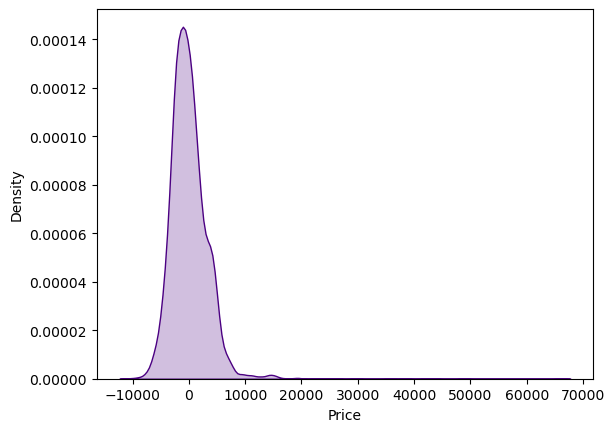

In [87]:
sns.kdeplot(residual, fill = True,color="indigo")

In [88]:
stats, p_val = shapiro(residual)

if p_val >= 0.05:
    print("Null Hypothesis H0 is True")
    print("normally distributed")
else:
    print("Alternative Hypothesis H1 is True")
    print(" NOt normally distributed")

Alternative Hypothesis H1 is True
 NOt normally distributed


<Axes: xlabel='Price', ylabel='Price'>

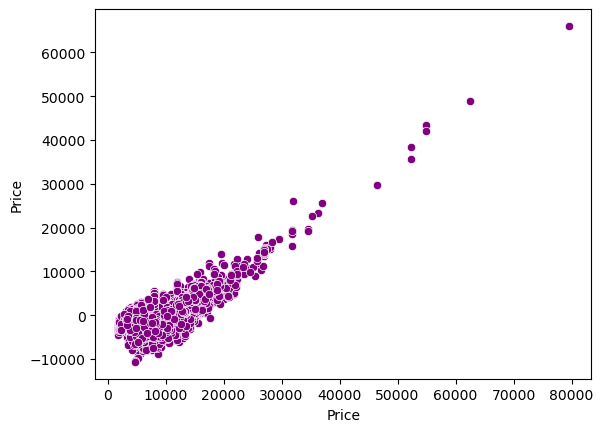

In [89]:
sns.scatterplot(x=ytrain, y=residual,color="Purple")

In [90]:
print("------------------------- Evaluation for Training Data -------------------------")
mse = mean_squared_error(ytrain, ytrain_pred)
print("mean squared error (MSE) : ", mse)
print("-"*80)

mae = mean_absolute_error(ytrain, ytrain_pred)
print("mean absolute error (MAE) : ", mae)
print("-"*80)

rmse = np.sqrt(mse)
print("Root mean squared error (RMSE) : ", rmse)
print("-"*80)

r2score = r2_score(ytrain, ytrain_pred)
print("R2 Score : ", r2score)
print("-"*80)

------------------------- Evaluation for Training Data -------------------------
mean squared error (MSE) :  11737153.482234113
--------------------------------------------------------------------------------
mean absolute error (MAE) :  2407.5663079348974
--------------------------------------------------------------------------------
Root mean squared error (RMSE) :  3425.9529305339433
--------------------------------------------------------------------------------
R2 Score :  0.44861225424425
--------------------------------------------------------------------------------


In [91]:
xtest

,Airline,Source,Destination,Total_Stops,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
6076,3,2,1,1.0,18.0,5.0,2023,5,45.0,18.0,15.0,12.0,30
3544,6,3,2,1.0,3.0,6.0,2023,10,35.0,19.0,35.0,9.0,0
7313,3,2,1,1.0,1.0,5.0,2023,14,5.0,19.0,50.0,5.0,45
5032,1,5,3,0.0,24.0,5.0,2023,14,45.0,17.0,5.0,2.0,20
2483,3,3,2,1.0,21.0,5.0,2023,22,50.0,4.0,25.0,5.0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9797,5,3,2,1.0,27.0,6.0,2023,8,0.0,21.0,0.0,13.0,0
9871,4,2,1,0.0,6.0,3.0,2023,17,15.0,19.0,45.0,2.0,30
10063,8,3,2,1.0,21.0,4.0,2023,7,55.0,22.0,25.0,14.0,30
7623,1,1,5,0.0,9.0,4.0,2023,8,30.0,11.0,20.0,2.0,50


In [92]:
ytest

6076     10844
3544      4959
7313     14781
5032      3858
2483     12898
         ...  
9797      7408
9871      4622
10063     7452
7623      4823
8618     13731
Name: Price, Length: 2137, dtype: int64

In [93]:
ytest_pred = ride_model.predict(xtest)
ytest_pred

array([ 9446.78995984, 10364.78239384, 10251.54043076, ...,
       10117.32386635,  5232.85211282, 10186.64358338])

In [94]:
print("------------------------- Evaluation for Testing Data -------------------------")
mse = mean_squared_error(ytest, ytest_pred)
print("mean squared error (MSE) : ", mse)
print("-"*80)

mae = mean_absolute_error(ytest, ytest_pred)
print("mean absolute error (MAE) : ", mae)
print("-"*80)

rmse = np.sqrt(mse)
print("Root mean squared error (RMSE) : ", rmse)
print("-"*80)

r2score = r2_score(ytest, ytest_pred)
print("R2 Score : ", r2score)
print("-"*80)

------------------------- Evaluation for Testing Data -------------------------
mean squared error (MSE) :  11899312.964355402
--------------------------------------------------------------------------------
mean absolute error (MAE) :  2444.2581247943695
--------------------------------------------------------------------------------
Root mean squared error (RMSE) :  3449.5380798529245
--------------------------------------------------------------------------------
R2 Score :  0.43775599842441537
--------------------------------------------------------------------------------


## Algorithm 2 DecisionTree

In [95]:
decision_tree = DecisionTreeRegressor(ccp_alpha=0.0)
decision_tree_model = decision_tree.fit(xtrain, ytrain)
print(decision_tree_model)



DecisionTreeRegressor()


In [96]:
xtrain

,Airline,Source,Destination,Total_Stops,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
8990,3,4,4,2.0,12.0,3.0,2023,6,30.0,16.0,35.0,10.0,5
3684,3,3,2,1.0,9.0,5.0,2023,11,30.0,12.0,35.0,25.0,5
1034,4,3,2,1.0,24.0,4.0,2023,15,45.0,22.0,5.0,6.0,20
3909,5,3,2,1.0,21.0,3.0,2023,12,50.0,1.0,35.0,12.0,45
3088,2,3,2,2.0,24.0,6.0,2023,17,15.0,19.0,15.0,26.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,3,3,2,1.0,27.0,3.0,2023,9,0.0,4.0,25.0,19.0,25
5191,3,2,1,1.0,9.0,5.0,2023,14,5.0,20.0,45.0,6.0,40
5390,5,3,2,1.0,15.0,5.0,2023,12,50.0,1.0,30.0,12.0,40
860,1,1,0,0.0,3.0,3.0,2023,0,40.0,3.0,25.0,2.0,45


In [97]:
ytrain

8990    23528
3684    12373
1034     5583
3909     7695
3088    11972
        ...  
5734    12242
5191    10844
5390     7670
860      6144
7270    10262
Name: Price, Length: 8546, dtype: int64

In [98]:
ytrain_pred=decision_tree_model.predict(xtrain)
ytrain_pred

array([23528., 12373.,  5583., ...,  7670.,  6502., 10262.])

In [99]:
print("------------------------- Evaluation for Training Data -------------------------")
mse = mean_squared_error(ytrain, ytrain_pred)
print("mean squared error (MSE) : ", mse)
print("-"*80)

mae = mean_absolute_error(ytrain, ytrain_pred)
print("mean absolute error (MAE) : ", mae)
print("-"*80)

rmse = np.sqrt(mse)
print("Root mean squared error (RMSE) : ", rmse)
print("-"*80)

r2score = r2_score(ytrain, ytrain_pred)
print("R2 Score : ", r2score)
print("-"*80)

------------------------- Evaluation for Training Data -------------------------
mean squared error (MSE) :  643658.5814279586
--------------------------------------------------------------------------------
mean absolute error (MAE) :  319.604372415945
--------------------------------------------------------------------------------
Root mean squared error (RMSE) :  802.2833548241908
--------------------------------------------------------------------------------
R2 Score :  0.9697622209007399
--------------------------------------------------------------------------------


In [100]:
ytest_pred = decision_tree_model.predict(xtest)
ytest_pred

array([14781.,  4959., 10844., ...,  6152.,  4823.,  6812.])

In [101]:
print("------------------------- Evaluation for Testing Data -------------------------")
mse = mean_squared_error(ytest, ytest_pred)
print("mean squared error (MSE) : ", mse)
print("-"*80)

mae = mean_absolute_error(ytest, ytest_pred)
print("mean absolute error (MAE) : ", mae)
print("-"*80)

rmse = np.sqrt(mse)
print("Root mean squared error (RMSE) : ", rmse)
print("-"*80)

r2score = r2_score(ytest, ytest_pred)
print("R2 Score : ", r2score)
print("-"*80)

------------------------- Evaluation for Testing Data -------------------------
mean squared error (MSE) :  7200094.561012063
--------------------------------------------------------------------------------
mean absolute error (MAE) :  1400.0813133676493
--------------------------------------------------------------------------------
Root mean squared error (RMSE) :  2683.299193346143
--------------------------------------------------------------------------------
R2 Score :  0.6597946461419657
--------------------------------------------------------------------------------


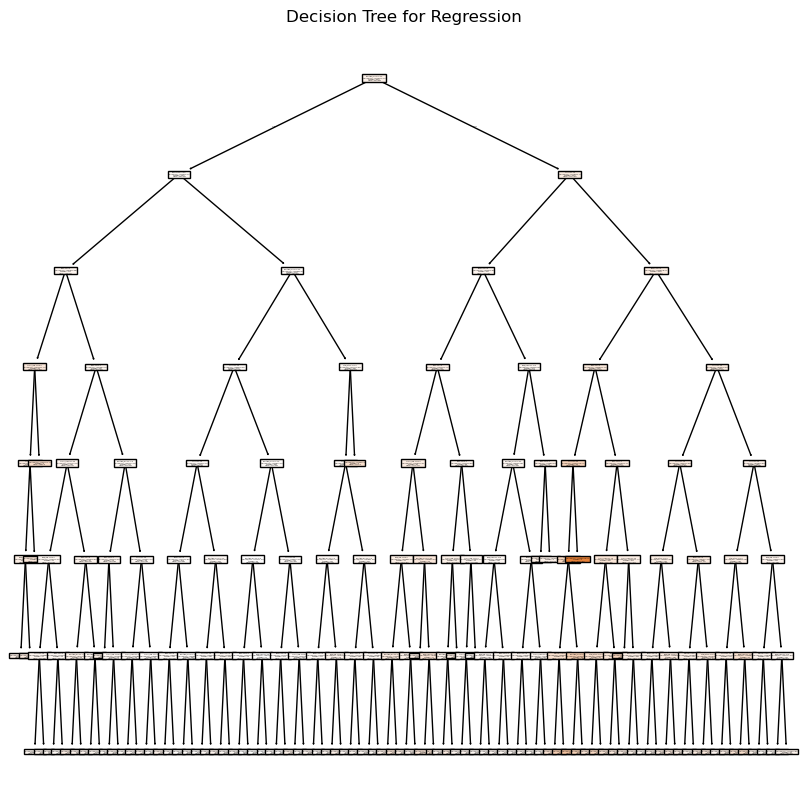

In [111]:
# Plot the decision tree
plt.figure(figsize=(10, 10))
plot_tree(best_dt, feature_names=X.columns, filled=True)
plt.title("Decision Tree for Regression")
plt.savefig("Decision_tree_regression.png")
plt.show()

In [103]:
# Hyperparameter tuning for regression
hyperparameters = {
    "criterion": ["squared_error", "absolute_error"],  #measure the quality of a split
    "max_depth": np.arange(2, 11),   #The maximum depth of the tree.
    "min_samples_split": np.arange(2, 11),      #minimum number of samples required to split an internal node.
    "min_samples_leaf": np.arange(2, 12)         #minimum number of samples required to be at a leaf node.
}


In [104]:
rscv_dt = RandomizedSearchCV(DecisionTreeRegressor(), hyperparameters, cv=5, scoring="neg_mean_squared_error", random_state=42)
rscv_dt = rscv_dt.fit(xtrain, ytrain)
rscv_dt

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])},
                   random_state=42, scoring='neg_mean_squared_error')

In [105]:
print("Best Parameters:", rscv_dt.best_params_)



Best Parameters: {'min_samples_split': 9, 'min_samples_leaf': 3, 'max_depth': 7, 'criterion': 'squared_error'}


In [106]:
# Train model with best parameters
best_dt = rscv_dt.best_estimator_
best_dt_model = best_dt.fit(xtrain, ytrain)
best_dt_model

DecisionTreeRegressor(max_depth=7, min_samples_leaf=3, min_samples_split=9)

In [107]:
# Evaluate the tuned model
ytrain_best_predict = best_dt_model.predict(xtrain)
ytest_best_pred = best_dt_model.predict(xtest)
ytrain_best_predict
ytest_best_pred

array([12085.22684172,  6172.28787879, 12085.22684172, ...,
        6172.28787879,  4439.60465116, 12085.22684172])

In [108]:
mse_train_best = mean_squared_error(ytrain, ytrain_best_predict)
mse_test_best = mean_squared_error(ytest, ytest_best_pred)
r2_train_best = r2_score(ytrain, ytrain_best_predict)
r2_test_best = r2_score(ytest, ytest_best_pred)

In [109]:
print(f"Tuned Model - Mean Squared Error (Train) = {mse_train_best}")
print(f"Tuned Model - R^2 Score (Train) = {r2_train_best}")
print("*"*60)
print(f"Tuned Model - Mean Squared Error (Test) = {mse_test_best}")
print(f"Tuned Model - R^2 Score (Test) = {r2_test_best}")
print("*"*60)

Tuned Model - Mean Squared Error (Train) = 4972957.1727863625
Tuned Model - R^2 Score (Train) = 0.7663805240859278
************************************************************
Tuned Model - Mean Squared Error (Test) = 5957845.3414998455
Tuned Model - R^2 Score (Test) = 0.7184910746017352
************************************************************


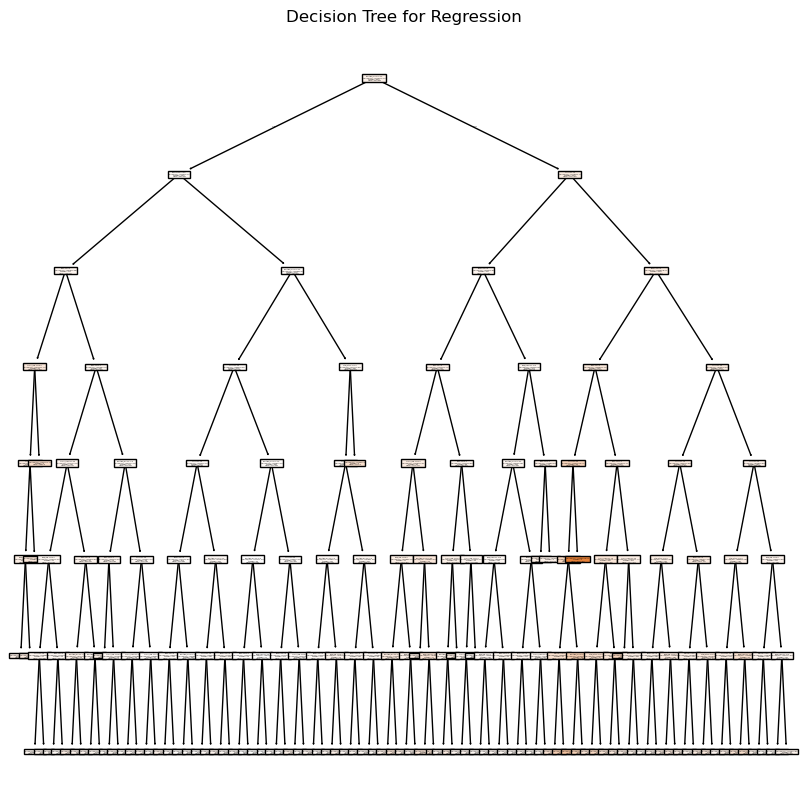

In [110]:
# Plot the decision tree
plt.figure(figsize=(10, 10))
plot_tree(best_dt, feature_names=X.columns, filled=True)
plt.title("Decision Tree for Regression")
plt.savefig("Decision_tree_regression.png")
plt.show()


## Algorithm3- Random forest

In [112]:
random_clf=RandomForestRegressor()
random_clf

RandomForestRegressor()

In [113]:
random_clf_model=random_clf.fit(xtrain,ytrain)
random_clf_model

RandomForestRegressor()

In [114]:

xtrain

,Airline,Source,Destination,Total_Stops,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
8990,3,4,4,2.0,12.0,3.0,2023,6,30.0,16.0,35.0,10.0,5
3684,3,3,2,1.0,9.0,5.0,2023,11,30.0,12.0,35.0,25.0,5
1034,4,3,2,1.0,24.0,4.0,2023,15,45.0,22.0,5.0,6.0,20
3909,5,3,2,1.0,21.0,3.0,2023,12,50.0,1.0,35.0,12.0,45
3088,2,3,2,2.0,24.0,6.0,2023,17,15.0,19.0,15.0,26.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,3,3,2,1.0,27.0,3.0,2023,9,0.0,4.0,25.0,19.0,25
5191,3,2,1,1.0,9.0,5.0,2023,14,5.0,20.0,45.0,6.0,40
5390,5,3,2,1.0,15.0,5.0,2023,12,50.0,1.0,30.0,12.0,40
860,1,1,0,0.0,3.0,3.0,2023,0,40.0,3.0,25.0,2.0,45


In [115]:
ytrain

8990    23528
3684    12373
1034     5583
3909     7695
3088    11972
        ...  
5734    12242
5191    10844
5390     7670
860      6144
7270    10262
Name: Price, Length: 8546, dtype: int64

In [116]:
ytrain_pred=random_clf_model.predict(xtrain)

print("------------------------- Evaluation for Training Data -------------------------")
mse = mean_squared_error(ytrain, ytrain_pred)
print("mean squared error (MSE) : ", mse)
print("-"*80)

mae = mean_absolute_error(ytrain, ytrain_pred)
print("mean absolute error (MAE) : ", mae)
print("-"*80)

rmse = np.sqrt(mse)
print("Root mean squared error (RMSE) : ", rmse)
print("-"*80)

r2score = r2_score(ytrain, ytrain_pred)
print("R2 Score : ", r2score)
print("-"*80)

------------------------- Evaluation for Training Data -------------------------
mean squared error (MSE) :  963461.4041150921
--------------------------------------------------------------------------------
mean absolute error (MAE) :  568.9211694655748
--------------------------------------------------------------------------------
Root mean squared error (RMSE) :  981.560698130835
--------------------------------------------------------------------------------
R2 Score :  0.9547385307228196
--------------------------------------------------------------------------------


In [117]:
ytest_pred=random_clf_model.predict(xtest)


print("------------------------- Evaluation for Testing Data -------------------------")
mse = mean_squared_error(ytest, ytest_pred)
print("mean squared error (MSE) : ", mse)
print("-"*80)

mae = mean_absolute_error(ytest, ytest_pred)
print("mean absolute error (MAE) : ", mae)
print("-"*80)

rmse = np.sqrt(mse)
print("Root mean squared error (RMSE) : ", rmse)
print("-"*80)

r2score = r2_score(ytest, ytest_pred)
print("R2 Score : ", r2score)
print("-"*80)

------------------------- Evaluation for Testing Data -------------------------
mean squared error (MSE) :  4451095.425098201
--------------------------------------------------------------------------------
mean absolute error (MAE) :  1200.1145020637089
--------------------------------------------------------------------------------
Root mean squared error (RMSE) :  2109.7619356453943
--------------------------------------------------------------------------------
R2 Score :  0.7896851935318806
--------------------------------------------------------------------------------


### Randomforest with hyperparameter tunning

In [118]:
hyp = {"criterion" : ["squared_error","absolute_error"],  # regression - “squared_error”, “friedman_mse”, “absolute_error”, “poisson”
       "max_depth" : np.arange(2,11),
       "min_samples_split" : np.arange(2,11),
       "min_samples_leaf" : np.arange(2, 12),
       "n_estimators" : np.arange(10, 101)

      }

In [119]:
rscv_rf = RandomizedSearchCV(random_clf_model, hyp, cv = 5)
rscv_rf = rscv_rf.fit(xtrain, ytrain)
rscv_rf.best_estimator_

RandomForestRegressor(max_depth=10, min_samples_leaf=9, min_samples_split=8,
                      n_estimators=93)

In [121]:
rscf_rf_clf=RandomForestRegressor(max_depth=9, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=51)
rscv_rf_clf_model=rscf_rf_clf.fit(xtrain,ytrain)
rscv_rf_clf_model

RandomForestRegressor(max_depth=9, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=51)

In [122]:
ytrain_pred=rscv_rf_clf_model.predict(xtrain)

print("------------------------- Evaluation for Training Data -------------------------")
mse = mean_squared_error(ytrain, ytrain_pred)
print("mean squared error (MSE) : ", mse)
print("-"*80)

mae = mean_absolute_error(ytrain, ytrain_pred)
print("mean absolute error (MAE) : ", mae)
print("-"*80)

rmse = np.sqrt(mse)
print("Root mean squared error (RMSE) : ", rmse)
print("-"*80)

r2score = r2_score(ytrain, ytrain_pred)
print("R2 Score : ", r2score)
print("-"*80)

------------------------- Evaluation for Training Data -------------------------
mean squared error (MSE) :  3148244.5489623304
--------------------------------------------------------------------------------
mean absolute error (MAE) :  1219.3435410861618
--------------------------------------------------------------------------------
Root mean squared error (RMSE) :  1774.3293237058137
--------------------------------------------------------------------------------
R2 Score :  0.8521018347789598
--------------------------------------------------------------------------------


In [124]:
ytest_pred=rscv_rf_clf_model.predict(xtest)


print("------------------------- Evaluation for Testing Data -------------------------")
mse = mean_squared_error(ytest, ytest_pred)
print("mean squared error (MSE) : ", mse)
print("-"*80)

mae = mean_absolute_error(ytest, ytest_pred)
print("mean absolute error (MAE) : ", mae)
print("-"*80)

rmse = np.sqrt(mse)
print("Root mean squared error (RMSE) : ", rmse)
print("-"*80)

r2score = r2_score(ytest, ytest_pred)
print("R2 Score : ", r2score)
print("-"*80)

------------------------- Evaluation for Testing Data -------------------------
mean squared error (MSE) :  4743948.421809408
--------------------------------------------------------------------------------
mean absolute error (MAE) :  1365.778531850489
--------------------------------------------------------------------------------
Root mean squared error (RMSE) :  2178.060702048822
--------------------------------------------------------------------------------
R2 Score :  0.7758478534066535
--------------------------------------------------------------------------------


### Algoirthm 4: AdaBoost

In [125]:
adbt_clf=AdaBoostRegressor(n_estimators=100,random_state=42)
adbt_clf

AdaBoostRegressor(n_estimators=100, random_state=42)

In [126]:
adbt_model=adbt_clf.fit(xtrain,ytrain)
adbt_model

AdaBoostRegressor(n_estimators=100, random_state=42)

In [127]:
ytrain_pred=adbt_model.predict(xtrain)

print("------------------------- Evaluation for Training Data -------------------------")
mse = mean_squared_error(ytrain, ytrain_pred)
print("mean squared error (MSE) : ", mse)
print("-"*80)

mae = mean_absolute_error(ytrain, ytrain_pred)
print("mean absolute error (MAE) : ", mae)
print("-"*80)

rmse = np.sqrt(mse)
print("Root mean squared error (RMSE) : ", rmse)
print("-"*80)

r2score = r2_score(ytrain, ytrain_pred)
print("R2 Score : ", r2score)
print("-"*80)

------------------------- Evaluation for Training Data -------------------------
mean squared error (MSE) :  12233636.940918852
--------------------------------------------------------------------------------
mean absolute error (MAE) :  2895.3219558435753
--------------------------------------------------------------------------------
Root mean squared error (RMSE) :  3497.661638998097
--------------------------------------------------------------------------------
R2 Score :  0.42528846491972905
--------------------------------------------------------------------------------


In [128]:
ytest_pred=adbt_model.predict(xtest)


print("------------------------- Evaluation for Testing Data -------------------------")
mse = mean_squared_error(ytest, ytest_pred)
print("mean squared error (MSE) : ", mse)
print("-"*80)

mae = mean_absolute_error(ytest, ytest_pred)
print("mean absolute error (MAE) : ", mae)
print("-"*80)

rmse = np.sqrt(mse)
print("Root mean squared error (RMSE) : ", rmse)
print("-"*80)

r2score = r2_score(ytest, ytest_pred)
print("R2 Score : ", r2score)
print("-"*80)

------------------------- Evaluation for Testing Data -------------------------
mean squared error (MSE) :  12576682.726184085
--------------------------------------------------------------------------------
mean absolute error (MAE) :  2930.6227468338525
--------------------------------------------------------------------------------
Root mean squared error (RMSE) :  3546.361900058155
--------------------------------------------------------------------------------
R2 Score :  0.40575019383908395
--------------------------------------------------------------------------------


In [129]:
# Hyperparameter tunning for adaboost
hyp = {"n_estimators" : np.arange(10, 101),  # number of weak learners
       "learning_rate":np.arange(0.01,1,0.01)  # learning rate
}

In [130]:
# Randomsized Search Cross-Validation
rscv_adaboost = RandomizedSearchCV(adbt_clf, hyp, cv=5, random_state=42,n_iter=50)
rscv_adaboost=rscv_adaboost.fit(xtrain,ytrain)



In [131]:
# Best Parameters
print("Best Parameters from RandomizedSearchCV:")
rscv_adaboost.best_params_

Best Parameters from RandomizedSearchCV:


{'n_estimators': 14, 'learning_rate': 0.31}

In [132]:
# Best adaboost Regressor
best_adaboost=rscv_adaboost.best_estimator_
best_adaboost_model=best_adaboost.fit(xtrain,ytrain)

In [133]:
# training prediction aand evakuation for tuned model
ytrain_pred=best_adaboost_model.predict(xtrain)

In [134]:
print("------------------------- Evaluation for Training Data -------------------------")
mse = mean_squared_error(ytrain, ytrain_pred)
print("mean squared error (MSE) : ", mse)
print("-"*80)

mae = mean_absolute_error(ytrain, ytrain_pred)
print("mean absolute error (MAE) : ", mae)
print("-"*80)

rmse = np.sqrt(mse)
print("Root mean squared error (RMSE) : ", rmse)
print("-"*80)

r2score = r2_score(ytrain, ytrain_pred)
print("R2 Score : ", r2score)
print("-"*80)

------------------------- Evaluation for Training Data -------------------------
mean squared error (MSE) :  9578786.578774445
--------------------------------------------------------------------------------
mean absolute error (MAE) :  2286.634849577211
--------------------------------------------------------------------------------
Root mean squared error (RMSE) :  3094.961482599492
--------------------------------------------------------------------------------
R2 Score :  0.5500079685640661
--------------------------------------------------------------------------------


In [135]:
# testing prediction and evalution for tunned model
ytest_pred=best_adaboost_model.predict(xtest)

In [136]:

print("------------------------- Evaluation for Testing Data -------------------------")
mse = mean_squared_error(ytest, ytest_pred)
print("mean squared error (MSE) : ", mse)
print("-"*80)

mae = mean_absolute_error(ytest, ytest_pred)
print("mean absolute error (MAE) : ", mae)
print("-"*80)

rmse = np.sqrt(mse)
print("Root mean squared error (RMSE) : ", rmse)
print("-"*80)

r2score = r2_score(ytest, ytest_pred)
print("R2 Score : ", r2score)
print("-"*80)

------------------------- Evaluation for Testing Data -------------------------
mean squared error (MSE) :  10607949.124484664
--------------------------------------------------------------------------------
mean absolute error (MAE) :  2349.0827893453243
--------------------------------------------------------------------------------
Root mean squared error (RMSE) :  3256.9846675237304
--------------------------------------------------------------------------------
R2 Score :  0.4987730987388508
--------------------------------------------------------------------------------


## Algoirthm 5: Gradient boost

In [137]:
gb_r=GradientBoostingRegressor(n_estimators=100,random_state=42)
gb_r

GradientBoostingRegressor(random_state=42)

In [138]:
gb_model=gb_r.fit(xtrain,ytrain)
gb_model

GradientBoostingRegressor(random_state=42)

In [139]:
ytrain_pred=gb_model.predict(xtrain)

print("------------------------- Evaluation for Training Data -------------------------")
mse = mean_squared_error(ytrain, ytrain_pred)
print("mean squared error (MSE) : ", mse)
print("-"*80)

mae = mean_absolute_error(ytrain, ytrain_pred)
print("mean absolute error (MAE) : ", mae)
print("-"*80)

rmse = np.sqrt(mse)
print("Root mean squared error (RMSE) : ", rmse)
print("-"*80)

r2score = r2_score(ytrain, ytrain_pred)
print("R2 Score : ", r2score)
print("-"*80)

------------------------- Evaluation for Training Data -------------------------
mean squared error (MSE) :  4697280.566899326
--------------------------------------------------------------------------------
mean absolute error (MAE) :  1504.7271801351822
--------------------------------------------------------------------------------
Root mean squared error (RMSE) :  2167.321057642205
--------------------------------------------------------------------------------
R2 Score :  0.7793312537928991
--------------------------------------------------------------------------------


In [140]:
ytest_pred=gb_model.predict(xtest)


print("------------------------- Evaluation for Testing Data -------------------------")
mse = mean_squared_error(ytest, ytest_pred)
print("mean squared error (MSE) : ", mse)
print("-"*80)

mae = mean_absolute_error(ytest, ytest_pred)
print("mean absolute error (MAE) : ", mae)
print("-"*80)

rmse = np.sqrt(mse)
print("Root mean squared error (RMSE) : ", rmse)
print("-"*80)

r2score = r2_score(ytest, ytest_pred)
print("R2 Score : ", r2score)
print("-"*80)

------------------------- Evaluation for Testing Data -------------------------
mean squared error (MSE) :  4976713.5365933515
--------------------------------------------------------------------------------
mean absolute error (MAE) :  1591.4887893389161
--------------------------------------------------------------------------------
Root mean squared error (RMSE) :  2230.854889183371
--------------------------------------------------------------------------------
R2 Score :  0.7648496730952901
--------------------------------------------------------------------------------


In [141]:
# Hyperparameter tunning for adaboost
hyp = {"n_estimators" : np.arange(10, 101),  # number of weak learners
       "learning_rate":np.arange(0.01,1,0.01)  # learning rate
}

In [142]:
# Randomsized Search Cross-Validation
rscv_gboost = RandomizedSearchCV(adbt_clf, hyp, cv=5, random_state=42,n_iter=50)
rscv_gboost=rscv_gboost.fit(xtrain,ytrain)

In [143]:
# Best Parameters
print("Best Parameters from RandomizedSearchCV:")
rscv_gboost.best_params_

Best Parameters from RandomizedSearchCV:


{'n_estimators': 14, 'learning_rate': 0.31}

In [145]:
# Best adaboost Regressor
best_gboost=rscv_gboost.best_estimator_
best_gboost_model=best_gboost.fit(xtrain,ytrain)

In [146]:
# training prediction aand evakuation for tuned model
ytrain_pred=best_gboost_model.predict(xtrain)

In [147]:
print("------------------------- Evaluation for Training Data -------------------------")
mse = mean_squared_error(ytrain, ytrain_pred)
print("mean squared error (MSE) : ", mse)
print("-"*80)

mae = mean_absolute_error(ytrain, ytrain_pred)
print("mean absolute error (MAE) : ", mae)
print("-"*80)

rmse = np.sqrt(mse)
print("Root mean squared error (RMSE) : ", rmse)
print("-"*80)

r2score = r2_score(ytrain, ytrain_pred)
print("R2 Score : ", r2score)
print("-"*80)

------------------------- Evaluation for Training Data -------------------------
mean squared error (MSE) :  9578786.578774445
--------------------------------------------------------------------------------
mean absolute error (MAE) :  2286.634849577211
--------------------------------------------------------------------------------
Root mean squared error (RMSE) :  3094.961482599492
--------------------------------------------------------------------------------
R2 Score :  0.5500079685640661
--------------------------------------------------------------------------------


In [148]:
# testing prediction and evalution for tunned model
ytest_pred=best_gboost_model.predict(xtest)

In [149]:
print("------------------------- Evaluation for Testing Data -------------------------")
mse = mean_squared_error(ytest, ytest_pred)
print("mean squared error (MSE) : ", mse)
print("-"*80)

mae = mean_absolute_error(ytest, ytest_pred)
print("mean absolute error (MAE) : ", mae)
print("-"*80)

rmse = np.sqrt(mse)
print("Root mean squared error (RMSE) : ", rmse)
print("-"*80)

r2score = r2_score(ytest, ytest_pred)
print("R2 Score : ", r2score)
print("-"*80)

------------------------- Evaluation for Testing Data -------------------------
mean squared error (MSE) :  10607949.124484664
--------------------------------------------------------------------------------
mean absolute error (MAE) :  2349.0827893453243
--------------------------------------------------------------------------------
Root mean squared error (RMSE) :  3256.9846675237304
--------------------------------------------------------------------------------
R2 Score :  0.4987730987388508
--------------------------------------------------------------------------------


## Algoirthm 6: XGboost

In [150]:
xg_r=XGBRegressor(n_estimators=100,random_state=42)
xg_r

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [151]:
xg_model=xg_r.fit(xtrain,ytrain)
xg_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [152]:
ytrain_pred=xg_model.predict(xtrain)

print("------------------------- Evaluation for Training Data -------------------------")
mse = mean_squared_error(ytrain, ytrain_pred)
print("mean squared error (MSE) : ", mse)
print("-"*80)

mae = mean_absolute_error(ytrain, ytrain_pred)
print("mean absolute error (MAE) : ", mae)
print("-"*80)

rmse = np.sqrt(mse)
print("Root mean squared error (RMSE) : ", rmse)
print("-"*80)

r2score = r2_score(ytrain, ytrain_pred)
print("R2 Score : ", r2score)
print("-"*80)

------------------------- Evaluation for Training Data -------------------------
mean squared error (MSE) :  1310118.1814045561
--------------------------------------------------------------------------------
mean absolute error (MAE) :  785.7798433631916
--------------------------------------------------------------------------------
Root mean squared error (RMSE) :  1144.6039408479057
--------------------------------------------------------------------------------
R2 Score :  0.9384533166885376
--------------------------------------------------------------------------------


In [153]:
ytest_pred=xg_model.predict(xtest)


print("------------------------- Evaluation for Testing Data -------------------------")
mse = mean_squared_error(ytest, ytest_pred)
print("mean squared error (MSE) : ", mse)
print("-"*80)

mae = mean_absolute_error(ytest, ytest_pred)
print("mean absolute error (MAE) : ", mae)
print("-"*80)

rmse = np.sqrt(mse)
print("Root mean squared error (RMSE) : ", rmse)
print("-"*80)

r2score = r2_score(ytest, ytest_pred)
print("R2 Score : ", r2score)
print("-"*80)

------------------------- Evaluation for Testing Data -------------------------
mean squared error (MSE) :  3379300.426324295
--------------------------------------------------------------------------------
mean absolute error (MAE) :  1150.8647429520247
--------------------------------------------------------------------------------
Root mean squared error (RMSE) :  1838.2873622816142
--------------------------------------------------------------------------------
R2 Score :  0.8403276205062866
--------------------------------------------------------------------------------


In [154]:
# Hyperparameter tunning for adaboost
hyp = {"n_estimators" : np.arange(10, 101),  # number of weak learners
       "learning_rate":np.arange(0.01,1,0.01)  # learning rate
}

In [155]:
# Randomsized Search Cross-Validation
rscv_xgboost = RandomizedSearchCV(adbt_clf, hyp, cv=5, random_state=42,n_iter=50)
rscv_xgboost=rscv_xgboost.fit(xtrain,ytrain)

In [156]:
# Best Parameters
print("Best Parameters from RandomizedSearchCV:")
rscv_xgboost.best_params_

Best Parameters from RandomizedSearchCV:


{'n_estimators': 14, 'learning_rate': 0.31}

In [157]:
# Best adaboost Regressor
best_xgboost=rscv_xgboost.best_estimator_
best_xgboost_model=best_xgboost.fit(xtrain,ytrain)

In [158]:
# training prediction aand evakuation for tuned model
ytrain_pred=best_xgboost_model.predict(xtrain)

In [159]:
print("------------------------- Evaluation for Training Data -------------------------")
mse = mean_squared_error(ytrain, ytrain_pred)
print("mean squared error (MSE) : ", mse)
print("-"*80)

mae = mean_absolute_error(ytrain, ytrain_pred)
print("mean absolute error (MAE) : ", mae)
print("-"*80)

rmse = np.sqrt(mse)
print("Root mean squared error (RMSE) : ", rmse)
print("-"*80)

r2score = r2_score(ytrain, ytrain_pred)
print("R2 Score : ", r2score)
print("-"*80)

------------------------- Evaluation for Training Data -------------------------
mean squared error (MSE) :  9578786.578774445
--------------------------------------------------------------------------------
mean absolute error (MAE) :  2286.634849577211
--------------------------------------------------------------------------------
Root mean squared error (RMSE) :  3094.961482599492
--------------------------------------------------------------------------------
R2 Score :  0.5500079685640661
--------------------------------------------------------------------------------


In [160]:
# testing prediction and evalution for tunned model
ytest_pred=best_xgboost_model.predict(xtest)

In [161]:
print("------------------------- Evaluation for Testing Data -------------------------")
mse = mean_squared_error(ytest, ytest_pred)
print("mean squared error (MSE) : ", mse)
print("-"*80)

mae = mean_absolute_error(ytest, ytest_pred)
print("mean absolute error (MAE) : ", mae)
print("-"*80)

rmse = np.sqrt(mse)
print("Root mean squared error (RMSE) : ", rmse)
print("-"*80)

r2score = r2_score(ytest, ytest_pred)
print("R2 Score : ", r2score)
print("-"*80)

------------------------- Evaluation for Testing Data -------------------------
mean squared error (MSE) :  10607949.124484664
--------------------------------------------------------------------------------
mean absolute error (MAE) :  2349.0827893453243
--------------------------------------------------------------------------------
Root mean squared error (RMSE) :  3256.9846675237304
--------------------------------------------------------------------------------
R2 Score :  0.4987730987388508
--------------------------------------------------------------------------------


### Algoritham:6 SVM

In [162]:
sv_r=SVR()
sv_r

SVR()

In [163]:
svr_model=sv_r.fit(xtrain,ytrain)
svr_model

SVR()

In [164]:
ytrain_pred=svr_model.predict(xtrain)

print("------------------------- Evaluation for Training Data -------------------------")
mse = mean_squared_error(ytrain, ytrain_pred)
print("mean squared error (MSE) : ", mse)
print("-"*80)

mae = mean_absolute_error(ytrain, ytrain_pred)
print("mean absolute error (MAE) : ", mae)
print("-"*80)

rmse = np.sqrt(mse)
print("Root mean squared error (RMSE) : ", rmse)
print("-"*80)

r2score = r2_score(ytrain, ytrain_pred)
print("R2 Score : ", r2score)
print("-"*80)

------------------------- Evaluation for Training Data -------------------------
mean squared error (MSE) :  21786124.475699082
--------------------------------------------------------------------------------
mean absolute error (MAE) :  3615.1422668474856
--------------------------------------------------------------------------------
Root mean squared error (RMSE) :  4667.560870058266
--------------------------------------------------------------------------------
R2 Score :  -0.023468090588804724
--------------------------------------------------------------------------------


In [165]:
ytest_pred=svr_model.predict(xtest)


print("------------------------- Evaluation for Testing Data -------------------------")
mse = mean_squared_error(ytest, ytest_pred)
print("mean squared error (MSE) : ", mse)
print("-"*80)

mae = mean_absolute_error(ytest, ytest_pred)
print("mean absolute error (MAE) : ", mae)
print("-"*80)

rmse = np.sqrt(mse)
print("Root mean squared error (RMSE) : ", rmse)
print("-"*80)

r2score = r2_score(ytest, ytest_pred)
print("R2 Score : ", r2score)
print("-"*80)

------------------------- Evaluation for Testing Data -------------------------
mean squared error (MSE) :  21753918.027462643
--------------------------------------------------------------------------------
mean absolute error (MAE) :  3632.978342581616
--------------------------------------------------------------------------------
Root mean squared error (RMSE) :  4664.1095642643995
--------------------------------------------------------------------------------
R2 Score :  -0.027875303250368022
--------------------------------------------------------------------------------


### KNN(K-Nearest Neighbors)

In [166]:
knn_r=KNeighborsRegressor()
knn_r

KNeighborsRegressor()

In [167]:
knn_model=knn_r.fit(xtrain,ytrain)
knn_model

KNeighborsRegressor()

In [168]:
ytrain_pred=knn_model.predict(xtrain)

print("------------------------- Evaluation for Training Data -------------------------")
mse = mean_squared_error(ytrain, ytrain_pred)
print("mean squared error (MSE) : ", mse)
print("-"*80)

mae = mean_absolute_error(ytrain, ytrain_pred)
print("mean absolute error (MAE) : ", mae)
print("-"*80)

rmse = np.sqrt(mse)
print("Root mean squared error (RMSE) : ", rmse)
print("-"*80)

r2score = r2_score(ytrain, ytrain_pred)
print("R2 Score : ", r2score)
print("-"*80)

------------------------- Evaluation for Training Data -------------------------
mean squared error (MSE) :  5299385.897584836
--------------------------------------------------------------------------------
mean absolute error (MAE) :  1383.959770652937
--------------------------------------------------------------------------------
Root mean squared error (RMSE) :  2302.0395082588907
--------------------------------------------------------------------------------
R2 Score :  0.7510455624200526
--------------------------------------------------------------------------------


In [169]:
ytest_pred=knn_model.predict(xtest)


print("------------------------- Evaluation for Testing Data -------------------------")
mse = mean_squared_error(ytest, ytest_pred)
print("mean squared error (MSE) : ", mse)
print("-"*80)

mae = mean_absolute_error(ytest, ytest_pred)
print("mean absolute error (MAE) : ", mae)
print("-"*80)

rmse = np.sqrt(mse)
print("Root mean squared error (RMSE) : ", rmse)
print("-"*80)

r2score = r2_score(ytest, ytest_pred)
print("R2 Score : ", r2score)
print("-"*80)

------------------------- Evaluation for Testing Data -------------------------
mean squared error (MSE) :  9065179.020907816
--------------------------------------------------------------------------------
mean absolute error (MAE) :  1877.5217594759006
--------------------------------------------------------------------------------
Root mean squared error (RMSE) :  3010.8435729721687
--------------------------------------------------------------------------------
R2 Score :  0.5716691759447011
--------------------------------------------------------------------------------


In [170]:
# Hyperparameter tunning for adaboost
hyp = {"n_neighbors":np.arange(1,21),  #Number of Neighbors
       "p":[1,2]
}
hyp

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 'p': [1, 2]}

In [171]:
# Randomsized Search Cross-Validation
knn = RandomizedSearchCV(knn_model, hyp, cv=5, random_state=42,n_iter=50)
knn_r=knn.fit(xtrain,ytrain)

In [172]:
# Best knn Regressor
knn_r.best_estimator_

KNeighborsRegressor(n_neighbors=4, p=1)

In [173]:
best_knn=knn_r.best_estimator_
best_knn_model=best_knn.fit(xtrain,ytrain)

In [174]:
# training prediction aand evakuation for tuned model
ytrain_pred=best_knn_model.predict(xtrain)

In [175]:
print("------------------------- Evaluation for Training Data -------------------------")
mse = mean_squared_error(ytrain, ytrain_pred)
print("mean squared error (MSE) : ", mse)
print("-"*80)

mae = mean_absolute_error(ytrain, ytrain_pred)
print("mean absolute error (MAE) : ", mae)
print("-"*80)

rmse = np.sqrt(mse)
print("Root mean squared error (RMSE) : ", rmse)
print("-"*80)

r2score = r2_score(ytrain, ytrain_pred)
print("R2 Score : ", r2score)
print("-"*80)

------------------------- Evaluation for Training Data -------------------------
mean squared error (MSE) :  4096105.704540136
--------------------------------------------------------------------------------
mean absolute error (MAE) :  1200.5610812075824
--------------------------------------------------------------------------------
Root mean squared error (RMSE) :  2023.883816956926
--------------------------------------------------------------------------------
R2 Score :  0.8075732336445727
--------------------------------------------------------------------------------


In [176]:
# testing prediction and evalution for tunned model
ytest_pred=best_knn_model.predict(xtest)

In [177]:
print("------------------------- Evaluation for Testing Data -------------------------")
mse = mean_squared_error(ytest, ytest_pred)
print("mean squared error (MSE) : ", mse)
print("-"*80)

mae = mean_absolute_error(ytest, ytest_pred)
print("mean absolute error (MAE) : ", mae)
print("-"*80)

rmse = np.sqrt(mse)
print("Root mean squared error (RMSE) : ", rmse)
print("-"*80)

r2score = r2_score(ytest, ytest_pred)
print("R2 Score : ", r2score)
print("-"*80)

------------------------- Evaluation for Testing Data -------------------------
mean squared error (MSE) :  7474813.937529246
--------------------------------------------------------------------------------
mean absolute error (MAE) :  1686.3923724847918
--------------------------------------------------------------------------------
Root mean squared error (RMSE) :  2734.0105957236606
--------------------------------------------------------------------------------
R2 Score :  0.6468141218019423
--------------------------------------------------------------------------------


## Naive Bayes

In [178]:
naive_g=GaussianNB()
naive_g

GaussianNB()

In [179]:
naive_model=naive_g.fit(xtrain,ytrain)
naive_model

GaussianNB()

In [180]:
ytrain_pred=naive_model.predict(xtrain)

print("------------------------- Evaluation for Training Data -------------------------")
mse = mean_squared_error(ytrain, ytrain_pred)
print("mean squared error (MSE) : ", mse)
print("-"*80)

mae = mean_absolute_error(ytrain, ytrain_pred)
print("mean absolute error (MAE) : ", mae)
print("-"*80)

rmse = np.sqrt(mse)
print("Root mean squared error (RMSE) : ", rmse)
print("-"*80)

r2score = r2_score(ytrain, ytrain_pred)
print("R2 Score : ", r2score)
print("-"*80)

------------------------- Evaluation for Training Data -------------------------
mean squared error (MSE) :  5138747.12754505
--------------------------------------------------------------------------------
mean absolute error (MAE) :  1014.2630470395507
--------------------------------------------------------------------------------
Root mean squared error (RMSE) :  2266.880483736417
--------------------------------------------------------------------------------
R2 Score :  0.7585920471301046
--------------------------------------------------------------------------------


In [181]:
ytest_pred=naive_model.predict(xtest)


print("------------------------- Evaluation for Testing Data -------------------------")
mse = mean_squared_error(ytest, ytest_pred)
print("mean squared error (MSE) : ", mse)
print("-"*80)

mae = mean_absolute_error(ytest, ytest_pred)
print("mean absolute error (MAE) : ", mae)
print("-"*80)

rmse = np.sqrt(mse)
print("Root mean squared error (RMSE) : ", rmse)
print("-"*80)

r2score = r2_score(ytest, ytest_pred)
print("R2 Score : ", r2score)
print("-"*80)

------------------------- Evaluation for Testing Data -------------------------
mean squared error (MSE) :  8552713.741226017
--------------------------------------------------------------------------------
mean absolute error (MAE) :  1593.8685072531587
--------------------------------------------------------------------------------
Root mean squared error (RMSE) :  2924.5023065858604
--------------------------------------------------------------------------------
R2 Score :  0.5958832234598765
--------------------------------------------------------------------------------


#### save model in pickle file

In [182]:
import pickle

In [191]:
with open("Flight Price Prediction (ModelTraning).pkl","wb") as f:
    pickle.dump(best_dt_model,f)

In [192]:
with open("Flight Price Prediction (Modeltraning).pkl", "rb") as f:
    final_model = pickle.load(f)

#### test it on new data

In [184]:
test=xtrain.head(1)
test

,Airline,Source,Destination,Total_Stops,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
8990,3,4,4,2.0,12.0,3.0,2023,6,30.0,16.0,35.0,10.0,5


In [193]:
def Predict_Charges(Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min):
        data = pd.DataFrame({Airline : [Airline],
                             Source : [Source],
                             Destination : [Destination],
                             Total_Stops : [Total_Stops],
                             Price : [Price],
                             Date : [Date],
                             Month :[Month],
                             Year :[Year],
                             Dep_hours :[Dep_hours],
                             Dep_min :[Dep_min],
                             Arrival_hours :[Arrival_hours],
                             Arrival_min :[Arrival_min],
                             Duration_hours :[Duration_hours],
                             Duration_min :[Duration_min]})
    
        with open("Regression_Model.pkl", "rb") as f:
            final_model = pickle.load(f)
    
        print(f"Predicted Flight charges = Rs. {final_model.predict(test)[0]}")

In [194]:
df.head(1).iloc[:,:14]
    

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,1,1,0,0.0,3897,24.0,3.0,2023,22,20.0,1.0,10.0,2.0,50


In [195]:
Predict_Charges(2,2,0,0.1,4561,25.0,4.0,2024,23,21.0,2.0,15.0,3.0,50)

Predicted Flight charges = Rs. 12993.920341967656


# Future Scope

# Challenges